<a href="https://colab.research.google.com/github/Ehsan-Roohi/DSMC_Python/blob/main/Supervised_Shock_wave_DSMC_Extrapolation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading data...
Normalizing data...
Normalization successful.

Building the deeper model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,577 (33.50 KB)

 Trainable params: 8,577 (33.50 KB)

 Non-trainable params: 0 (0.00 B)


Starting training for 200 epochs...
Epoch 1/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.2411 - val_loss: 0.0455
Epoch 2/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0266 - val_loss: 0.0409
Epoch 3/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0163 - val_loss: 0.0330
Epoch 4/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0111 - val_loss: 0.0318
Epoch 5/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0079 - val_loss: 0.0185
Epoch 6/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0061 - val_loss: 0.0194
Epoch 7/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0045 - val_loss: 0.0105
Epoch 8/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0040 - val_loss: 0.0144
Epoch 9/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0025 - val_loss: 0.0076
Epoch 10/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0020 - val_loss: 0.0082
Epoch 11/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0012 - val_loss: 0.0053
Epoch 12/200
45/45 ━━━━━━━

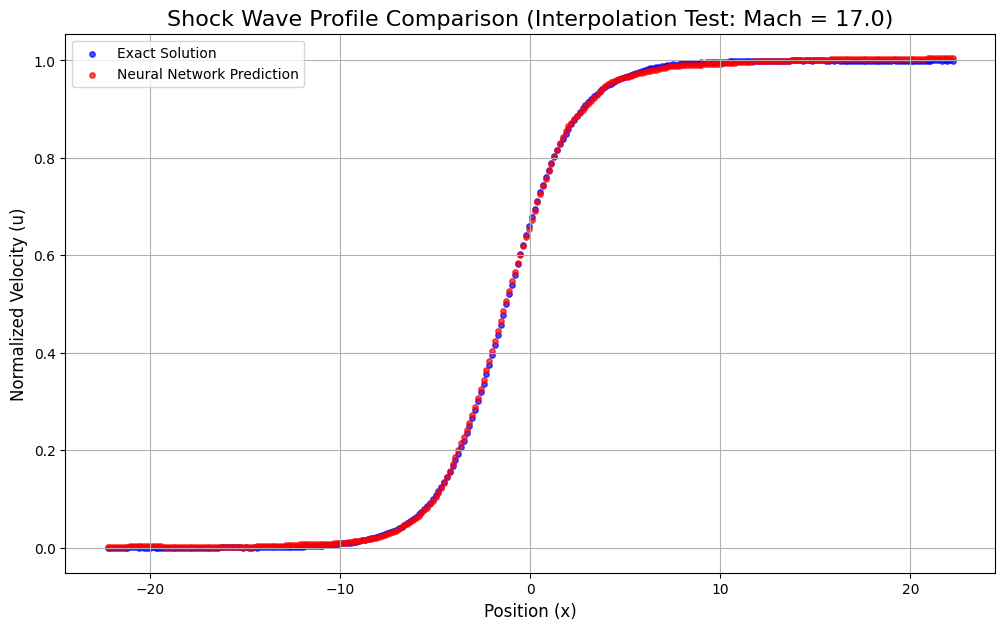

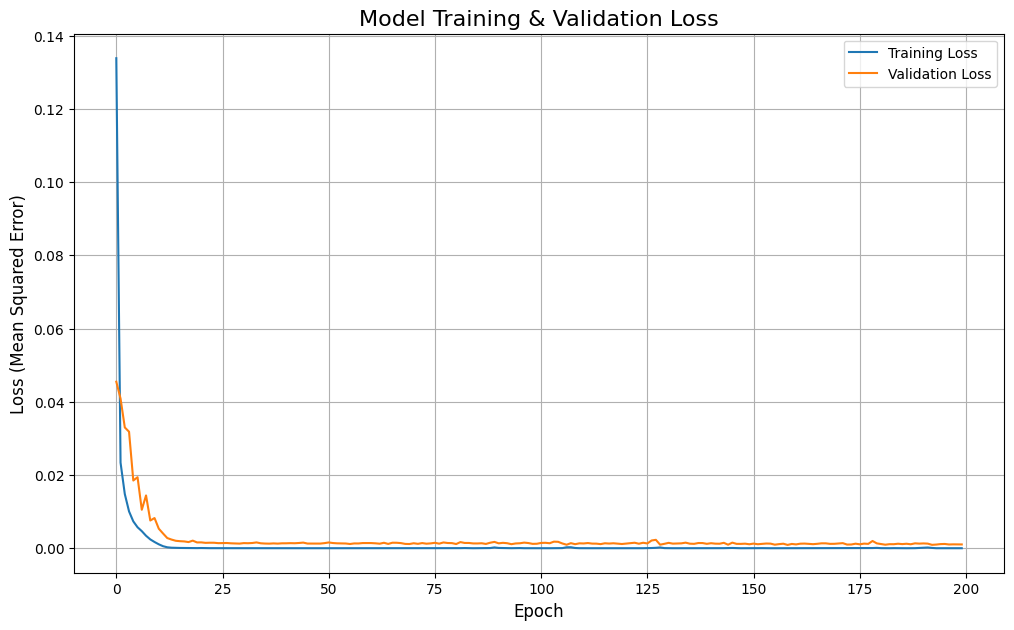

In [3]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import MinMaxScaler

# -- 1. Data Loading and Normalization --

# --- MODIFIED: The path is now set for the main Colab session folder ---
DATASET_PATH = './'

# The train/test split for the interpolation test
train_files = ['M14.txt', 'M15.txt', 'M16.txt', 'M18.txt', 'M19.txt', 'M20.txt']
test_file = 'M17.txt'
# ---------------------------------------------------------

# A check to make sure at least one data file exists in the path
if not os.path.exists(os.path.join(DATASET_PATH, train_files[0])):
    raise FileNotFoundError(f"Data files not found in '{DATASET_PATH}'. Please make sure you have uploaded the .txt files to the Colab session.")


def load_data(files, path):
    x_data, y_data, mach_data = [], [], []
    for file_name in files:
        mach_number = float(file_name.replace('M', '').replace('.txt', ''))
        full_path = os.path.join(path, file_name)
        data = np.loadtxt(full_path)
        x_data.extend(data[:, 0])
        y_data.extend(data[:, 2])
        mach_data.extend([mach_number] * len(data))
    return np.array(x_data), np.array(y_data), np.array(mach_data)

print("Loading data...")
x_train, y_train, mach_train = load_data(train_files, DATASET_PATH)
x_test, y_test, mach_test = load_data([test_file], DATASET_PATH)

X_train_original = np.stack([x_train, mach_train], axis=1)
X_test_original = np.stack([x_test, mach_test], axis=1)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

print("Normalizing data...")
x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

X_train_scaled = x_scaler.fit_transform(X_train_original)
y_train_scaled = y_scaler.fit_transform(y_train)

X_test_scaled = x_scaler.transform(X_test_original)
y_test_scaled = y_scaler.transform(y_test)
print("Normalization successful.")


# -- 2. Neural Network Design and Training --
print("\nBuilding the deeper model...")
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[2]),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

print("\nStarting training for 200 epochs...")
history = model.fit(
    X_train_scaled, y_train_scaled,
    epochs=200,
    validation_split=0.2,
    verbose=1
)
print("Training finished.")


# -- 3. Evaluation and Plotting --
print("\nEvaluating and predicting...")
loss = model.evaluate(X_test_scaled, y_test_scaled, verbose=0)
print(f"Mean Squared Error on Test Data (normalized): {loss:.6f}")

y_pred_scaled = model.predict(X_test_scaled)
y_pred = y_scaler.inverse_transform(y_pred_scaled)

print("Plotting results...")
test_mach_number = mach_test[0]

# --- Comparison Plot ---
plt.figure(figsize=(12, 7))
plt.scatter(x_test, y_test, label='Exact Solution', color='blue', s=15, alpha=0.7)
plt.scatter(x_test, y_pred, label='Neural Network Prediction', color='red', s=15, alpha=0.7)
plt.title(f'Shock Wave Profile Comparison (Interpolation Test: Mach = {test_mach_number})', fontsize=16)
plt.xlabel('Position (x)', fontsize=12)
plt.ylabel('Normalized Velocity (u)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# --- Loss Curve Plot ---
plt.figure(figsize=(12, 7))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Training & Validation Loss', fontsize=16)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss (Mean Squared Error)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

Loading data...
Normalizing data...
Normalization successful.

Building the multi-output model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 64)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,837 (34.52 KB)

 Trainable params: 8,837 (34.52 KB)

 Non-trainable params: 0 (0.00 B)


Starting training for 200 epochs...
Epoch 1/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.3298 - val_loss: 0.0847
Epoch 2/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0512 - val_loss: 0.0284
Epoch 3/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0175 - val_loss: 0.0267
Epoch 4/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0129 - val_loss: 0.0214
Epoch 5/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0102 - val_loss: 0.0208
Epoch 6/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0080 - val_loss: 0.0184
Epoch 7/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0070 - val_loss: 0.0145
Epoch 8/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0051 - val_loss: 0.0149
Epoch 9/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0040 - val_loss: 0.0114
Epoch 10/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0031 - val_loss: 0.0115
Epoch 11/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0023 - val_loss: 0.0078
Epoch 12/200
45/45 ━━━━━━━

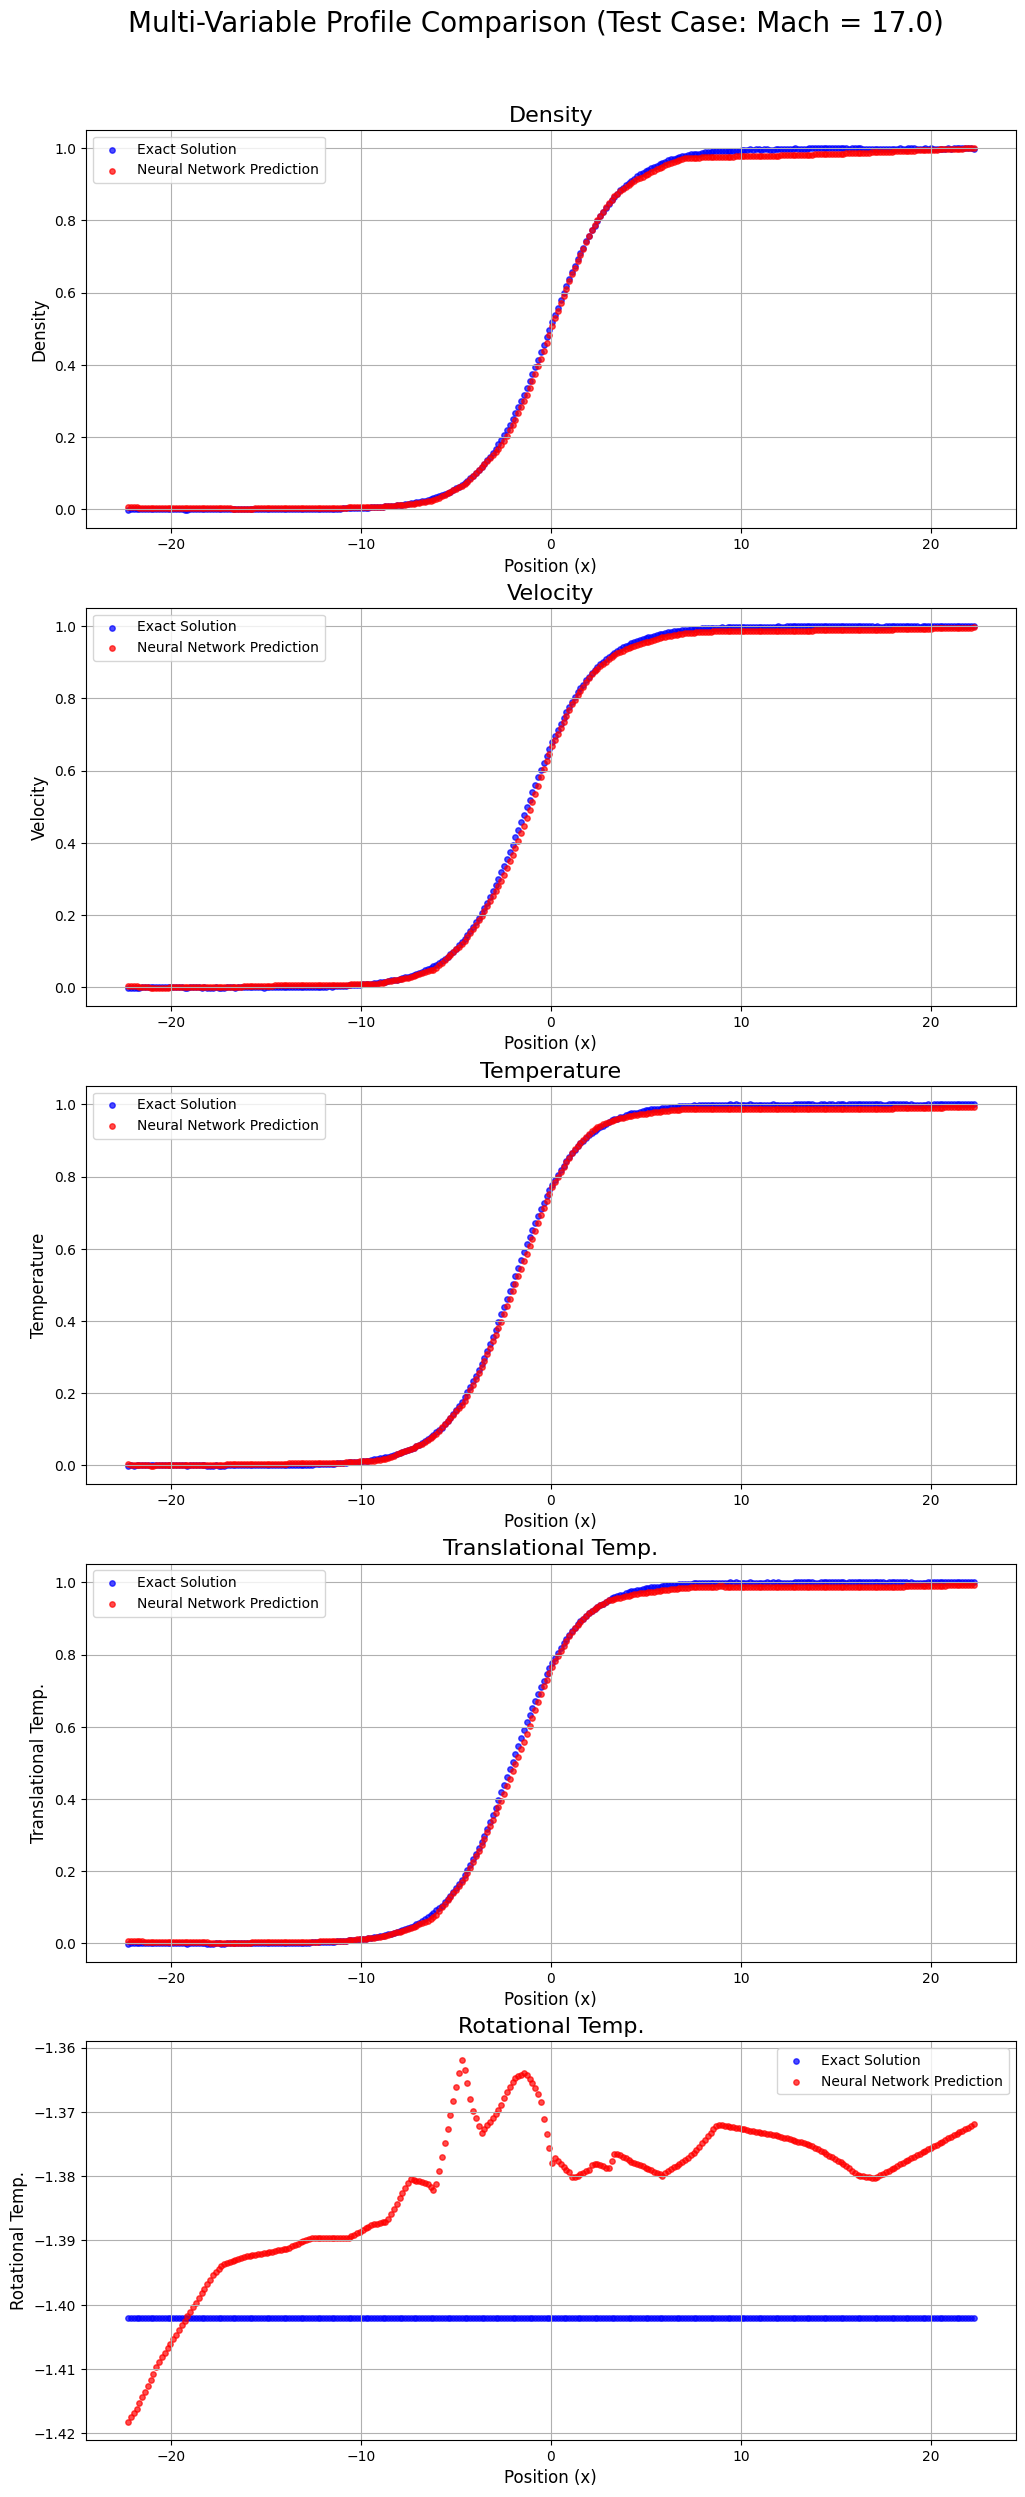

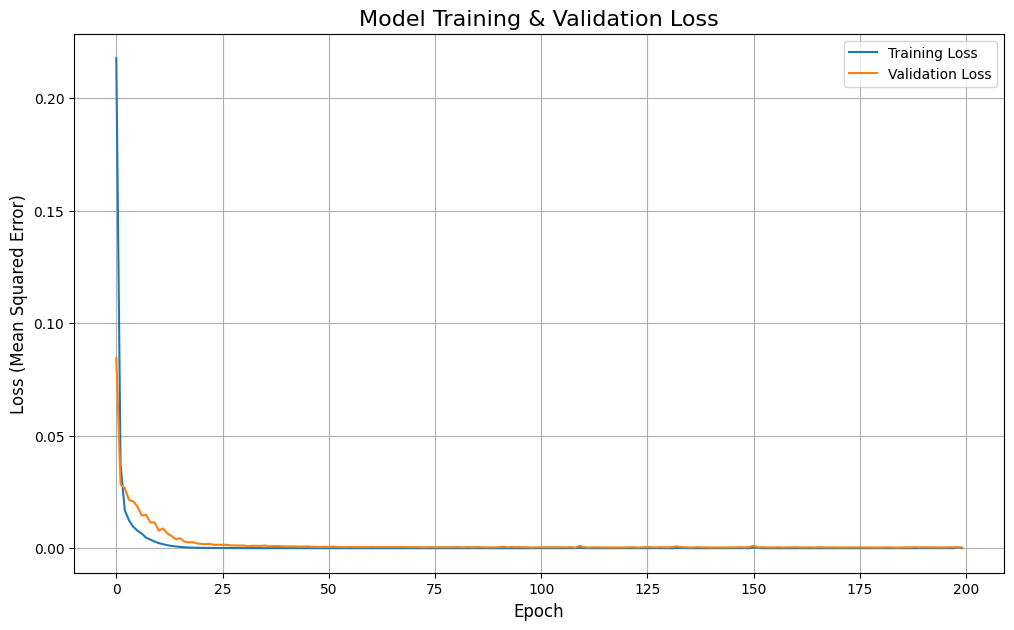

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import MinMaxScaler

# -- 1. Data Loading and Normalization --

# Path for files uploaded directly to the Colab session
DATASET_PATH = './'

# The train/test split for the interpolation test
train_files = ['M14.txt', 'M15.txt', 'M16.txt', 'M18.txt', 'M19.txt', 'M20.txt']
test_file = 'M17.txt'

# A check to make sure at least one data file exists in the path
if not os.path.exists(os.path.join(DATASET_PATH, train_files[0])):
    raise FileNotFoundError(f"Data files not found in '{DATASET_PATH}'. Please make sure you have uploaded the .txt files.")

# MODIFIED: The function now loads all 6 columns
def load_data(files, path):
    x_data, y_data, mach_data = [], [], []
    for file_name in files:
        mach_number = float(file_name.replace('M', '').replace('.txt', ''))
        full_path = os.path.join(path, file_name)
        data = np.loadtxt(full_path)

        # Input features (Position)
        x_data.append(data[:, 0])

        # Output features (Density, Velocity, Temp, T_trans, T_rot)
        # Columns 2 through 6 correspond to indices 1 through 5
        y_data.append(data[:, 1:6])

        # Input feature (Mach number)
        mach_data.append(np.full(data.shape[0], mach_number))

    # Concatenate all data into single numpy arrays
    return np.concatenate(x_data), np.concatenate(y_data, axis=0), np.concatenate(mach_data)

print("Loading data...")
# Load the data, y_train and y_test will now have 5 columns
x_train, y_train, mach_train = load_data(train_files, DATASET_PATH)
x_test, y_test, mach_test = load_data([test_file], DATASET_PATH)

# Prepare input and output arrays
X_train_original = np.stack([x_train, mach_train], axis=1)
X_test_original = np.stack([x_test, mach_test], axis=1)

print("Normalizing data...")
x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler() # This scaler will now handle all 5 output columns

# Fit scalers on training data and transform
X_train_scaled = x_scaler.fit_transform(X_train_original)
y_train_scaled = y_scaler.fit_transform(y_train)

# Transform test data using the fitted scalers
X_test_scaled = x_scaler.transform(X_test_original)
y_test_scaled = y_scaler.transform(y_test)
print("Normalization successful.")


# -- 2. Neural Network Design and Training --
# MODIFIED: The output layer now has 5 neurons for the 5 output variables
print("\nBuilding the multi-output model...")
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[2]),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(5) # The output layer now has 5 neurons
])
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

print("\nStarting training for 200 epochs...")
history = model.fit(
    X_train_scaled, y_train_scaled,
    epochs=200,
    validation_split=0.2,
    verbose=1
)
print("Training finished.")


# -- 3. Evaluation and Plotting --
print("\nEvaluating and predicting...")
loss = model.evaluate(X_test_scaled, y_test_scaled, verbose=0)
print(f"Mean Squared Error on Test Data (normalized): {loss:.6f}")

# Predict all 5 variables at once
y_pred_scaled = model.predict(X_test_scaled)
# Inverse transform to get back to original scale
y_pred = y_scaler.inverse_transform(y_pred_scaled)

print("Plotting results...")
test_mach_number = mach_test[0]

# --- MODIFIED: Create subplots for each output variable ---
output_labels = [
    'Density', 'Velocity', 'Temperature',
    'Translational Temp.', 'Rotational Temp.'
]

# Create a figure and a set of subplots
fig, axes = plt.subplots(5, 1, figsize=(12, 30))
fig.suptitle(f'Multi-Variable Profile Comparison (Test Case: Mach = {test_mach_number})', fontsize=20, y=0.92)

for i in range(5):
    ax = axes[i]
    # Plot the exact solution for the i-th variable
    ax.scatter(x_test, y_test[:, i], label='Exact Solution', color='blue', s=15, alpha=0.7)
    # Plot the NN prediction for the i-th variable
    ax.scatter(x_test, y_pred[:, i], label='Neural Network Prediction', color='red', s=15, alpha=0.7)

    ax.set_title(output_labels[i], fontsize=16)
    ax.set_xlabel('Position (x)', fontsize=12)
    ax.set_ylabel(output_labels[i], fontsize=12)
    ax.legend()
    ax.grid(True)

plt.show()

# --- Loss Curve Plot (No Changes) ---
plt.figure(figsize=(12, 7))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Training & Validation Loss', fontsize=16)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss (Mean Squared Error)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

Loading data for velocity prediction...
Normalizing data...
Normalization successful.

Building model with sigmoid output layer...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 64)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,577 (33.50 KB)

 Trainable params: 8,577 (33.50 KB)

 Non-trainable params: 0 (0.00 B)


Starting training for 200 epochs...
Epoch 1/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1738 - val_loss: 0.0859
Epoch 2/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0620 - val_loss: 0.0112
Epoch 3/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0078 - val_loss: 0.0049
Epoch 4/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0012 - val_loss: 0.0024
Epoch 5/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.7739e-04 - val_loss: 0.0018
Epoch 6/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.7905e-04 - val_loss: 0.0017
Epoch 7/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.8815e-04 - val_loss: 8.2902e-04
Epoch 8/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.4255e-04 - val_loss: 0.0011
Epoch 9/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.1402e-04 - val_loss: 0.0015
Epoch 10/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0643e-04 - val_loss: 9.3883e-04
Epoch 11/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.1155e-04 - val_lo

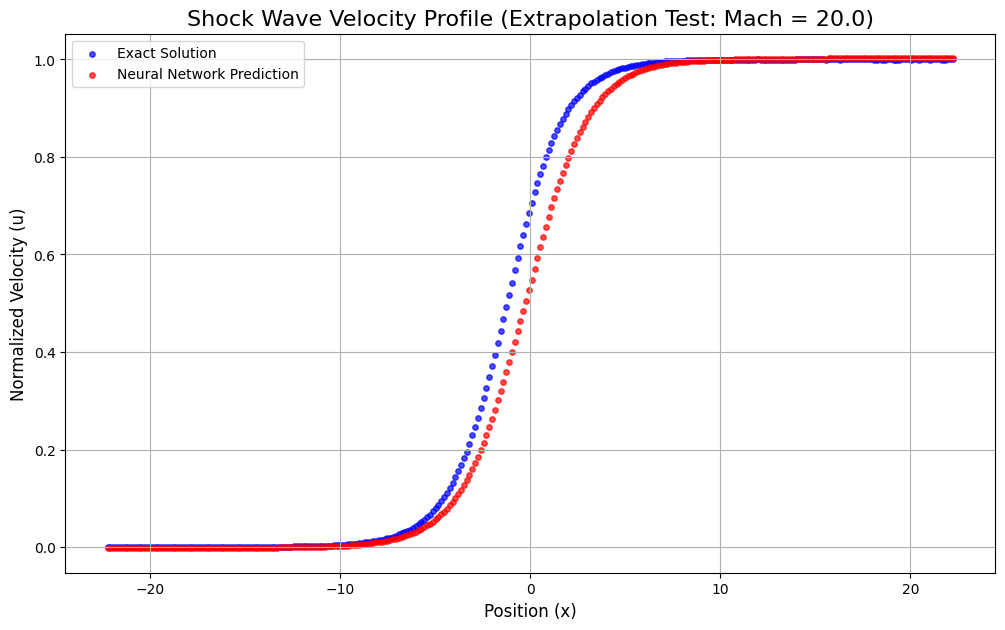

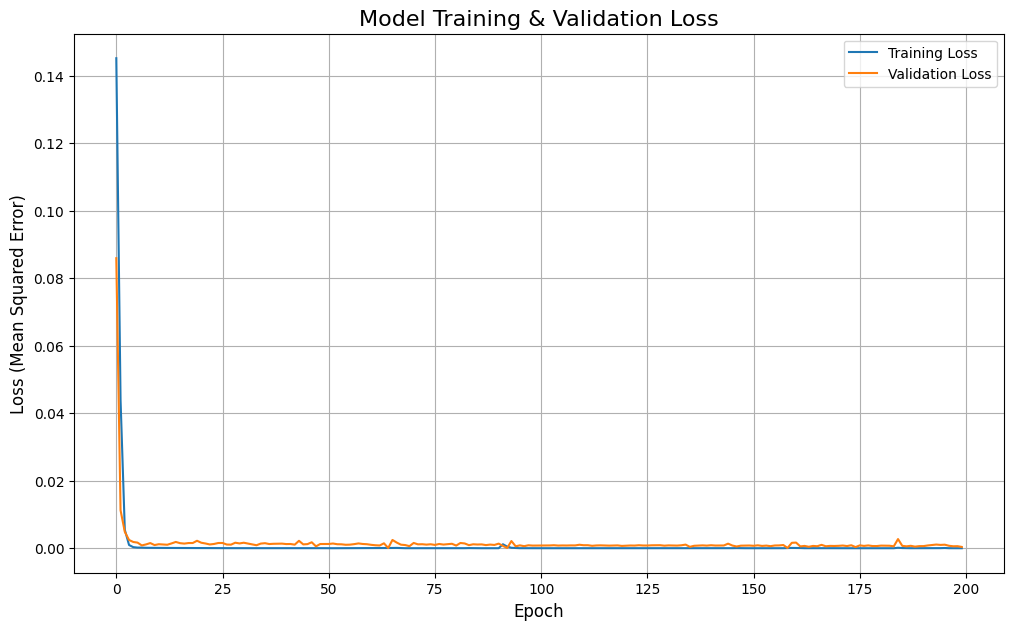

In [5]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import MinMaxScaler

# -- 1. Data Loading and Normalization --

# Path for files uploaded directly to the Colab session
DATASET_PATH = './'

# MODIFIED: Setup for the extrapolation test
train_files = ['M14.txt', 'M15.txt', 'M16.txt', 'M17.txt', 'M18.txt', 'M19.txt']
test_file = 'M20.txt'
# ---------------------------------------------------------

if not os.path.exists(os.path.join(DATASET_PATH, train_files[0])):
    raise FileNotFoundError(f"Data files not found in '{DATASET_PATH}'. Please make sure you have uploaded the .txt files.")

# MODIFIED: The function now only loads Velocity (column 3, index 2)
def load_data(files, path):
    x_data, y_data, mach_data = [], [], []
    for file_name in files:
        mach_number = float(file_name.replace('M', '').replace('.txt', ''))
        full_path = os.path.join(path, file_name)
        data = np.loadtxt(full_path)

        x_data.append(data[:, 0])      # Position (Input)
        y_data.append(data[:, 2])      # Velocity (Output)
        mach_data.append(np.full(data.shape[0], mach_number))

    return np.concatenate(x_data), np.concatenate(y_data), np.concatenate(mach_data)

print("Loading data for velocity prediction...")
x_train, y_train, mach_train = load_data(train_files, DATASET_PATH)
x_test, y_test, mach_test = load_data([test_file], DATASET_PATH)

X_train_original = np.stack([x_train, mach_train], axis=1)
X_test_original = np.stack([x_test, mach_test], axis=1)
# Reshape y data for the scaler
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

print("Normalizing data...")
x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

X_train_scaled = x_scaler.fit_transform(X_train_original)
# Note: Since velocity is already 0-1, scaling y is not strictly necessary
# but we do it to maintain a consistent workflow.
y_train_scaled = y_scaler.fit_transform(y_train)

X_test_scaled = x_scaler.transform(X_test_original)
y_test_scaled = y_scaler.transform(y_test)
print("Normalization successful.")


# -- 2. Neural Network Design and Training --
# MODIFIED: The output layer now has a 'sigmoid' activation function
print("\nBuilding model with sigmoid output layer...")
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[2]),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid') # <<<< KEY CHANGE HERE
])
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

print("\nStarting training for 200 epochs...")
history = model.fit(
    X_train_scaled, y_train_scaled,
    epochs=200,
    validation_split=0.2,
    verbose=1
)
print("Training finished.")


# -- 3. Evaluation and Plotting --
print("\nEvaluating and predicting...")
loss = model.evaluate(X_test_scaled, y_test_scaled, verbose=0)
print(f"Mean Squared Error on Test Data (normalized): {loss:.6f}")

y_pred_scaled = model.predict(X_test_scaled)
# The output of the model is already scaled (0-1) due to sigmoid,
# but we use the scaler to be consistent if the original data was not perfectly 0-1.
y_pred = y_scaler.inverse_transform(y_pred_scaled)

print("Plotting results...")
test_mach_number = mach_test[0]

# --- Comparison Plot ---
plt.figure(figsize=(12, 7))
plt.scatter(x_test, y_test, label='Exact Solution', color='blue', s=15, alpha=0.7)
plt.scatter(x_test, y_pred, label='Neural Network Prediction', color='red', s=15, alpha=0.7)
plt.title(f'Shock Wave Velocity Profile (Extrapolation Test: Mach = {test_mach_number})', fontsize=16)
plt.xlabel('Position (x)', fontsize=12)
plt.ylabel('Normalized Velocity (u)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# --- Loss Curve Plot ---
plt.figure(figsize=(12, 7))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Training & Validation Loss', fontsize=16)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss (Mean Squared Error)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

Loading data for velocity prediction...
Normalizing input data...
Normalization successful.

Building a wider model (128 neurons)...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,537 (131.00 KB)

 Trainable params: 33,537 (131.00 KB)

 Non-trainable params: 0 (0.00 B)


Starting training for 300 epochs...
Epoch 1/300
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1497 - val_loss: 0.0254
Epoch 2/300
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0205 - val_loss: 0.0016
Epoch 3/300
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.5968e-04 - val_loss: 9.6931e-04
Epoch 4/300
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.2938e-04 - val_loss: 0.0019
Epoch 5/300
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.9523e-04 - val_loss: 0.0015
Epoch 6/300
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.8051e-04 - val_loss: 8.4714e-04
Epoch 7/300
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0789e-04 - val_loss: 9.6081e-04
Epoch 8/300
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.0066e-04 - val_loss: 0.0014
Epoch 9/300
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.8477e-05 - val_loss: 6.5629e-04
Epoch 10/300
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.7645e-05 - val_loss: 6.2579e-04
Epoch 11/300
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 

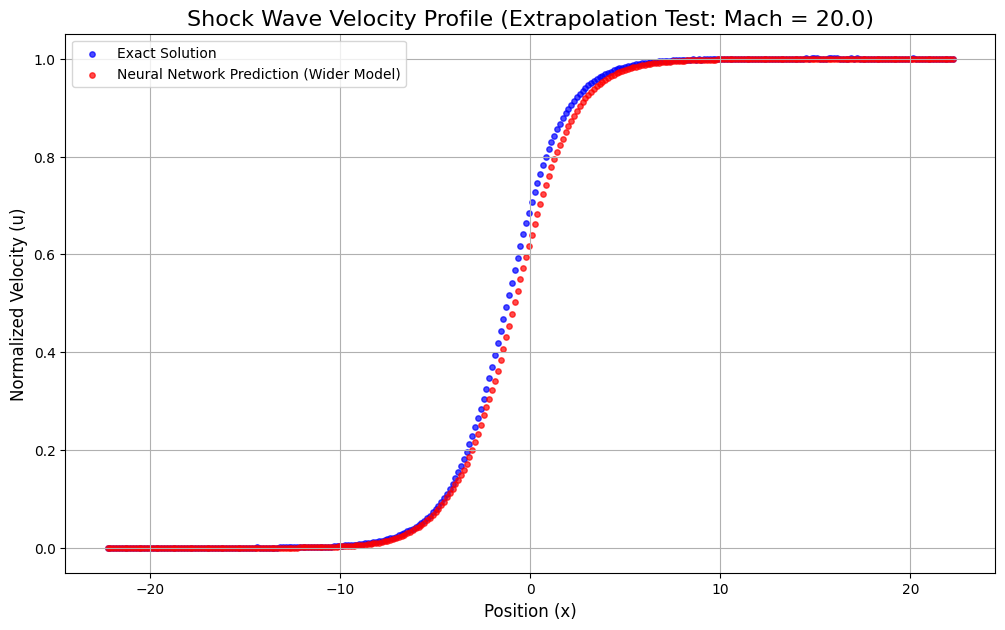

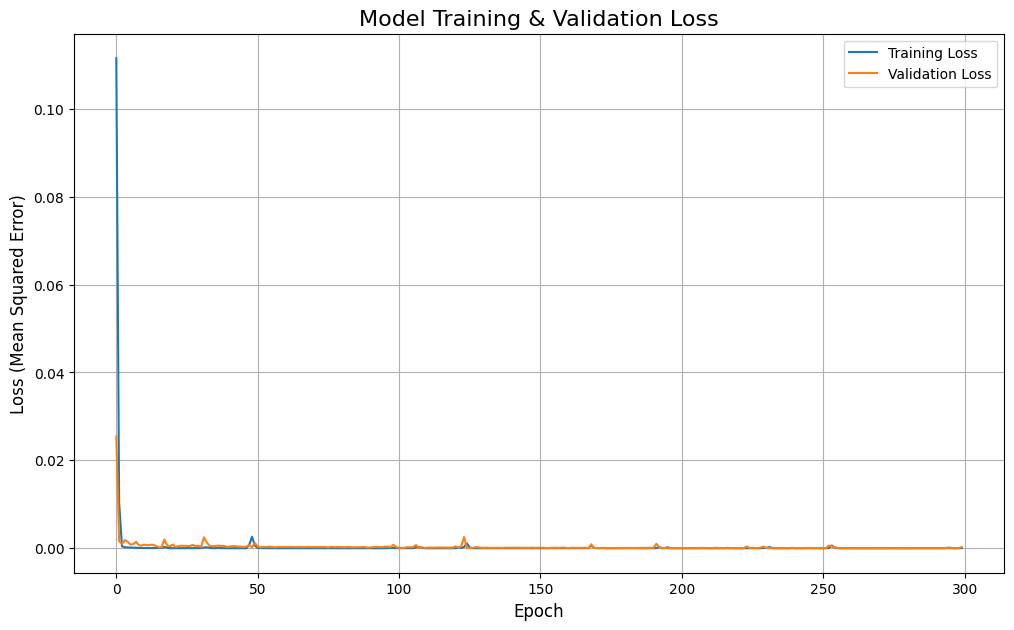

In [6]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import MinMaxScaler

# -- 1. Data Loading and Normalization --

# Path for files uploaded directly to the Colab session
DATASET_PATH = './'

# Setup for the extrapolation test
train_files = ['M14.txt', 'M15.txt', 'M16.txt', 'M17.txt', 'M18.txt', 'M19.txt']
test_file = 'M20.txt'

if not os.path.exists(os.path.join(DATASET_PATH, train_files[0])):
    raise FileNotFoundError(f"Data files not found in '{DATASET_PATH}'. Please make sure you have uploaded the .txt files.")

# Function to load only Velocity (column 3, index 2)
def load_data(files, path):
    x_data, y_data, mach_data = [], [], []
    for file_name in files:
        mach_number = float(file_name.replace('M', '').replace('.txt', ''))
        full_path = os.path.join(path, file_name)
        data = np.loadtxt(full_path)

        x_data.append(data[:, 0])      # Position (Input)
        y_data.append(data[:, 2])      # Velocity (Output)
        mach_data.append(np.full(data.shape[0], mach_number))

    return np.concatenate(x_data), np.concatenate(y_data), np.concatenate(mach_data)

print("Loading data for velocity prediction...")
x_train, y_train, mach_train = load_data(train_files, DATASET_PATH)
x_test, y_test, mach_test = load_data([test_file], DATASET_PATH)

X_train_original = np.stack([x_train, mach_train], axis=1)
X_test_original = np.stack([x_test, mach_test], axis=1)
# Reshape y data for the scaler
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

print("Normalizing input data...")
x_scaler = MinMaxScaler()
X_train_scaled = x_scaler.fit_transform(X_train_original)
X_test_scaled = x_scaler.transform(X_test_original)
# Note: We are not scaling the y-data anymore as sigmoid will handle the 0-1 range.
print("Normalization successful.")


# -- 2. Neural Network Design and Training --
# -- IMPROVEMENT: Increased network capacity (more neurons) --
print("\nBuilding a wider model (128 neurons)...")
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=[2]), # <<<< Increased neurons
    layers.Dense(128, activation='relu'), # <<<< Increased neurons
    layers.Dense(128, activation='relu'), # <<<< Increased neurons
    layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

# -- IMPROVEMENT: Increased training time --
print("\nStarting training for 300 epochs...")
history = model.fit(
    X_train_scaled, y_train, # Using y_train directly (not scaled)
    epochs=300, # <<<< Increased epochs
    validation_split=0.2,
    verbose=1
)
print("Training finished.")


# -- 3. Evaluation and Plotting --
print("\nEvaluating and predicting...")
# We evaluate against the un-scaled test data
loss = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Mean Squared Error on Test Data: {loss:.6f}")

y_pred = model.predict(X_test_scaled)

print("Plotting results...")
test_mach_number = mach_test[0]

# --- Comparison Plot ---
plt.figure(figsize=(12, 7))
plt.scatter(x_test, y_test, label='Exact Solution', color='blue', s=15, alpha=0.7)
plt.scatter(x_test, y_pred, label='Neural Network Prediction (Wider Model)', color='red', s=15, alpha=0.7)
plt.title(f'Shock Wave Velocity Profile (Extrapolation Test: Mach = {test_mach_number})', fontsize=16)
plt.xlabel('Position (x)', fontsize=12)
plt.ylabel('Normalized Velocity (u)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# --- Loss Curve Plot ---
plt.figure(figsize=(12, 7))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Training & Validation Loss', fontsize=16)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss (Mean Squared Error)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

Loading data for velocity prediction...
Normalizing input data...
Normalization successful.

Building the PINN model...

Starting PINN training...
Epoch 1/300


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py:667: UserWarning: `model.compiled_loss()` is deprecated. Instead, use `model.compute_loss(x, y, y_pred, sample_weight, training)`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py:642: UserWarning: `model.compiled_metrics()` is deprecated. Instead, use e.g.:
```
for metric in self.metrics:
    metric.update_state(y, y_pred)
```

  return self._compiled_metrics_update_state(
/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py:667: UserWarning: `model.compiled_loss()` is deprecated. Instead, use `model.compute_loss(x, y, y_pred, sample_weight, training)`.
  warnings.warn(


57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - data_loss: 0.1462 - physics_loss: 0.0214 - total_loss: 0.1676
Epoch 2/300
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - data_loss: 0.1268 - physics_loss: 0.0337 - total_loss: 0.1605
Epoch 3/300
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - data_loss: 0.1271 - physics_loss: 0.0346 - total_loss: 0.1617
Epoch 4/300
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - data_loss: 0.1272 - physics_loss: 0.0343 - total_loss: 0.1616
Epoch 5/300
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - data_loss: 0.1326 - physics_loss: 0.0310 - total_loss: 0.1636
Epoch 6/300
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - data_loss: 0.1302 - physics_loss: 0.0326 - total_loss: 0.1628
Epoch 7/300
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - data_loss: 0.1279 - physics_loss: 0.0332 - total_loss: 0.1611
Epoch 8/300
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - data_loss: 0.1279 - physics_loss: 0.0338 - total_loss: 0.1616
Epoch 9/300
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - data_loss: 0.1275 - physics_loss: 0.033

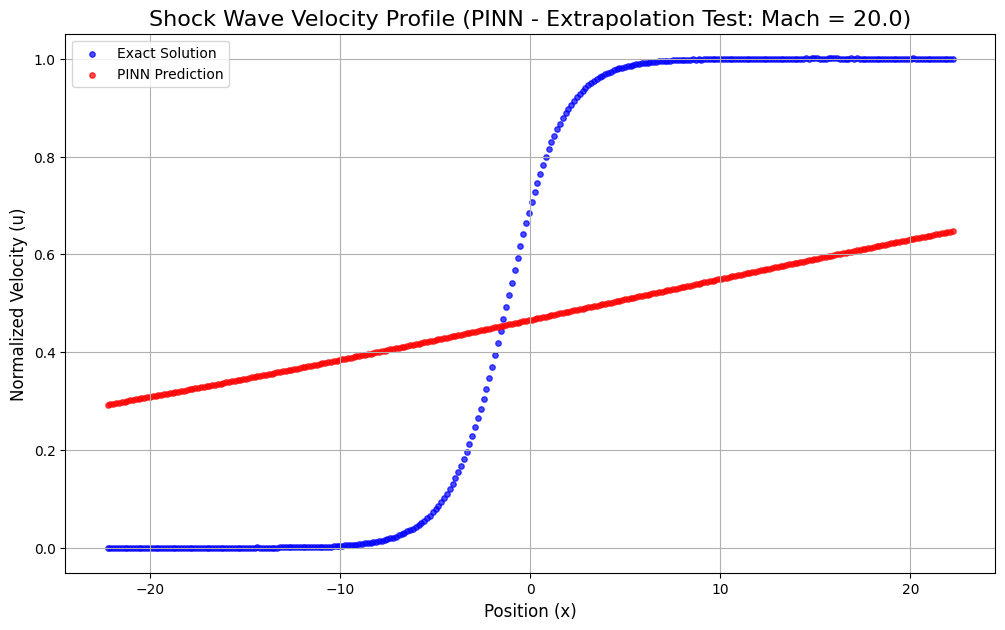

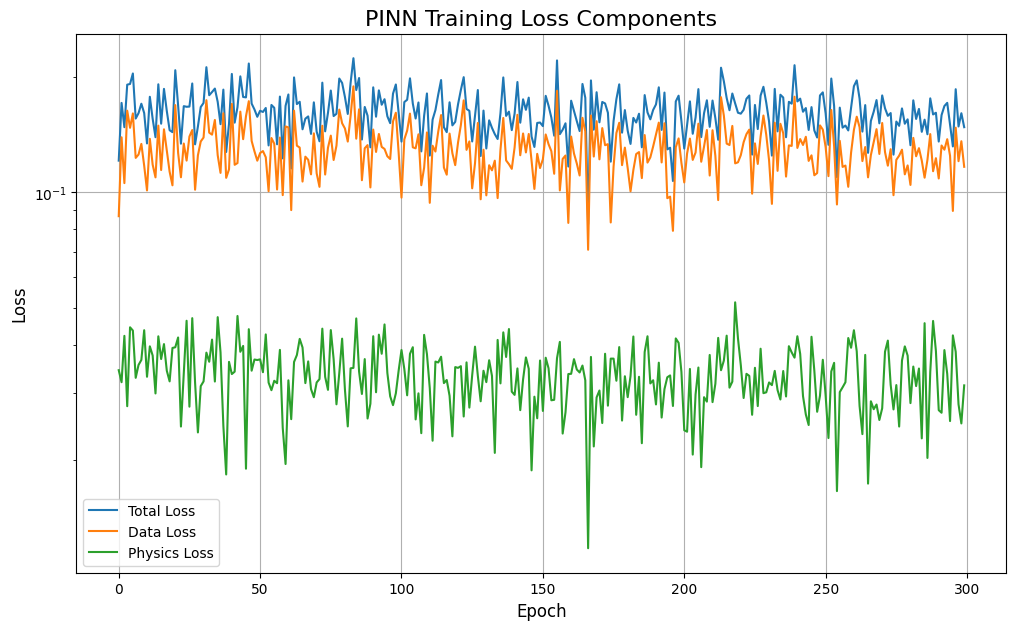

In [8]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import MinMaxScaler

# --- 1. Data Loading and Normalization (No Changes) ---

# Path for files uploaded directly to the Colab session
DATASET_PATH = './'

# Setup for the extrapolation test
train_files = ['M14.txt', 'M15.txt', 'M16.txt', 'M17.txt', 'M18.txt', 'M19.txt']
test_file = 'M20.txt'

if not os.path.exists(os.path.join(DATASET_PATH, train_files[0])):
    raise FileNotFoundError(f"Data files not found in '{DATASET_PATH}'. Please make sure you have uploaded the .txt files.")

def load_data(files, path):
    x_data, y_data, mach_data = [], [], []
    for file_name in files:
        mach_number = float(file_name.replace('M', '').replace('.txt', ''))
        full_path = os.path.join(path, file_name)
        data = np.loadtxt(full_path)
        x_data.append(data[:, 0])
        y_data.append(data[:, 2])
        mach_data.append(np.full(data.shape[0], mach_number))
    return np.concatenate(x_data), np.concatenate(y_data), np.concatenate(mach_data)

print("Loading data for velocity prediction...")
x_train, y_train, mach_train = load_data(train_files, DATASET_PATH)
x_test, y_test, mach_test = load_data([test_file], DATASET_PATH)

X_train_original = np.stack([x_train, mach_train], axis=1)
X_test_original = np.stack([x_test, mach_test], axis=1)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

print("Normalizing input data...")
x_scaler = MinMaxScaler()
X_train_scaled = x_scaler.fit_transform(X_train_original)
X_test_scaled = x_scaler.transform(X_test_original)
print("Normalization successful.")

X_train_tf = tf.convert_to_tensor(X_train_scaled, dtype=tf.float32)
y_train_tf = tf.convert_to_tensor(y_train, dtype=tf.float32)


# --- 2. Physics-Informed Neural Network (PINN) Model ---

class PINN(keras.Model):
    def __init__(self, **kwargs):
        super(PINN, self).__init__(**kwargs)
        self.dense1 = layers.Dense(128, activation='relu')
        self.dense2 = layers.Dense(128, activation='relu')
        self.dense3 = layers.Dense(128, activation='relu')
        self.u_output = layers.Dense(1, activation='sigmoid')
        self.nu = 0.05 / np.pi
        self.lambda_physics = 1.0

    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        x = self.dense3(x)
        return self.u_output(x)

    # --- CORRECTED train_step method ---
    def train_step(self, data):
        x, y = data

        with tf.GradientTape() as tape: # Main tape for updating model weights
            # --- Part 1: Data Loss ---
            y_pred = self(x, training=True)
            data_loss = self.compiled_loss(y, y_pred)

            # --- Part 2: Physics Loss ---
            # We need two nested tapes to compute the second derivative correctly
            with tf.GradientTape() as tape2:
                tape2.watch(x)
                with tf.GradientTape() as tape1:
                    tape1.watch(x)
                    # Get the model prediction for the physics loss
                    u_for_physics = self(x, training=True)
                # First derivative of u with respect to the inputs x
                du_dx = tape1.gradient(u_for_physics, x)
            # Second derivative of u with respect to the inputs x
            d2u_dx2 = tape2.gradient(du_dx, x)

            # The input x has two features (position, mach). The derivatives
            # are also calculated for both. We only need the derivative
            # with respect to the first feature, which is position.
            du_dx_component = du_dx[:, 0]
            d2u_dx2_component = d2u_dx2[:, 0]

            # Burgers' equation residual: u * du/dx - nu * d2u/dx2 = 0
            physics_residual = y_pred[:, 0] * du_dx_component - self.nu * d2u_dx2_component
            physics_loss = tf.reduce_mean(tf.square(physics_residual))

            # --- Part 3: Total Loss ---
            total_loss = data_loss + self.lambda_physics * physics_loss

        # Calculate gradients of total loss w.r.t. model weights and update
        trainable_vars = self.trainable_variables
        gradients = tape.gradient(total_loss, trainable_vars)
        self.optimizer.apply_gradients(zip(gradients, trainable_vars))

        # Update metrics and return the loss components for logging
        self.compiled_metrics.update_state(y, y_pred)
        return {"data_loss": data_loss, "physics_loss": physics_loss, "total_loss": total_loss}

print("\nBuilding the PINN model...")
model = PINN()
model.compile(optimizer='adam', loss='mean_squared_error')

print("\nStarting PINN training...")
history = model.fit(X_train_tf, y_train_tf, epochs=300, verbose=1)
print("Training finished.")


# --- 3. Evaluation and Plotting ---
print("\nEvaluating and predicting...")
y_pred = model.predict(X_test_scaled)

print("Plotting results...")
test_mach_number = mach_test[0]

plt.figure(figsize=(12, 7))
plt.scatter(x_test, y_test, label='Exact Solution', color='blue', s=15, alpha=0.7)
plt.scatter(x_test, y_pred, label='PINN Prediction', color='red', s=15, alpha=0.7)
plt.title(f'Shock Wave Velocity Profile (PINN - Extrapolation Test: Mach = {test_mach_number})', fontsize=16)
plt.xlabel('Position (x)', fontsize=12)
plt.ylabel('Normalized Velocity (u)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 7))
plt.plot(history.history['total_loss'], label='Total Loss')
plt.plot(history.history['data_loss'], label='Data Loss')
plt.plot(history.history['physics_loss'], label='Physics Loss')
plt.title('PINN Training Loss Components', fontsize=16)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.show()

Loading data for velocity prediction...
Normalizing input data...
Normalization successful.

Building the PINN model...

Starting PINN training with new hyperparameters...
Epoch 1/300


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py:667: UserWarning: `model.compiled_loss()` is deprecated. Instead, use `model.compute_loss(x, y, y_pred, sample_weight, training)`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py:642: UserWarning: `model.compiled_metrics()` is deprecated. Instead, use e.g.:
```
for metric in self.metrics:
    metric.update_state(y, y_pred)
```

  return self._compiled_metrics_update_state(
/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py:667: UserWarning: `model.compiled_loss()` is deprecated. Instead, use `model.compute_loss(x, y, y_pred, sample_weight, training)`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py:642: UserWarning: `model.compiled_metrics()` is deprecated. Instead, use e.g.:
```
for metric in self.metrics:
    metric.update_state(y, y_pred)
```

  return self._compiled_metrics_upda

57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - data_loss: 0.2000 - physics_loss: 2.8084e-04 - total_loss: 0.2028
Epoch 2/300
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - data_loss: 0.1928 - physics_loss: 7.2538e-04 - total_loss: 0.2001
Epoch 3/300
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - data_loss: 0.1946 - physics_loss: 6.2107e-04 - total_loss: 0.2008
Epoch 4/300
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - data_loss: 0.1931 - physics_loss: 5.8344e-04 - total_loss: 0.1989
Epoch 5/300
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - data_loss: 0.1942 - physics_loss: 6.1278e-04 - total_loss: 0.2003
Epoch 6/300
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - data_loss: 0.1947 - physics_loss: 5.4899e-04 - total_loss: 0.2002
Epoch 7/300
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - data_loss: 0.1923 - physics_loss: 5.8833e-04 - total_loss: 0.1981
Epoch 8/300
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - data_loss: 0.1939 - physics_loss: 5.7917e-04 - total_loss: 0.1997
Epoch 9/300
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - data_lo

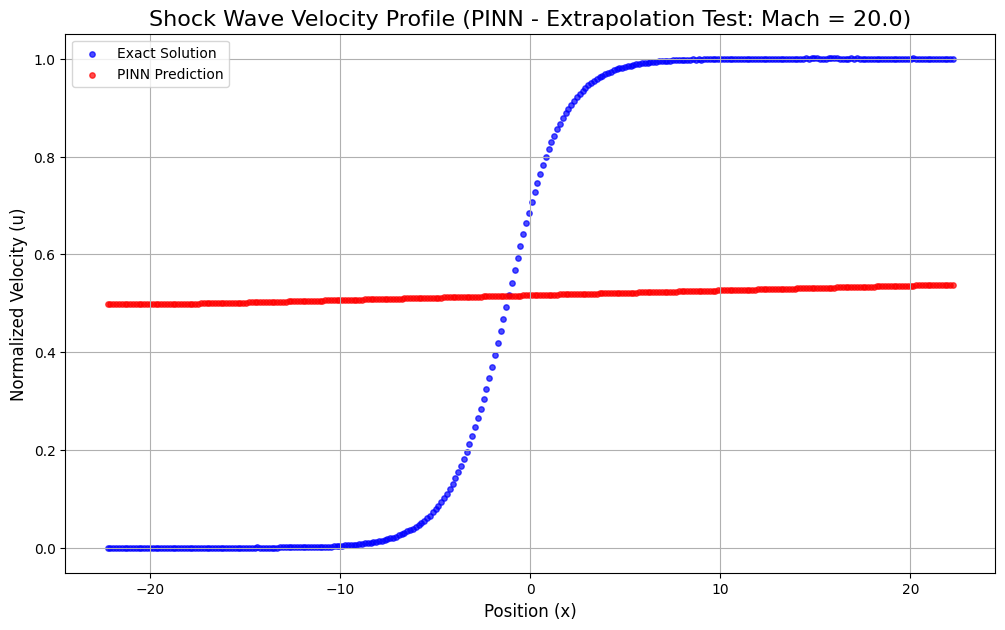

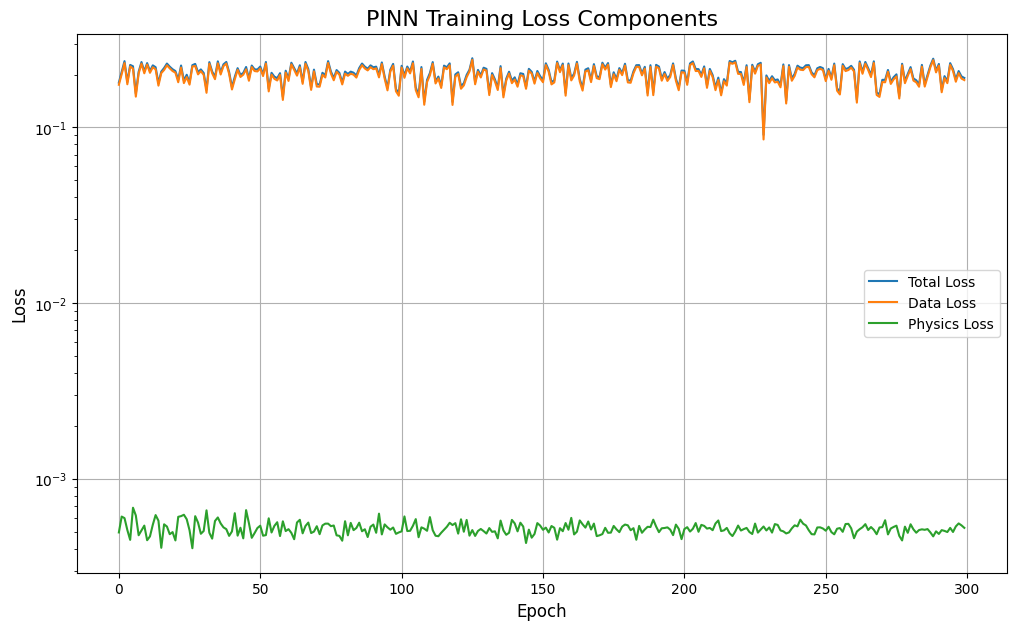

In [9]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import MinMaxScaler

# --- 1. Data Loading and Normalization (No Changes) ---

# Path for files uploaded directly to the Colab session
DATASET_PATH = './'

# Setup for the extrapolation test
train_files = ['M14.txt', 'M15.txt', 'M16.txt', 'M17.txt', 'M18.txt', 'M19.txt']
test_file = 'M20.txt'

if not os.path.exists(os.path.join(DATASET_PATH, train_files[0])):
    raise FileNotFoundError(f"Data files not found in '{DATASET_PATH}'. Please make sure you have uploaded the .txt files.")

def load_data(files, path):
    x_data, y_data, mach_data = [], [], []
    for file_name in files:
        mach_number = float(file_name.replace('M', '').replace('.txt', ''))
        full_path = os.path.join(path, file_name)
        data = np.loadtxt(full_path)
        x_data.append(data[:, 0])
        y_data.append(data[:, 2])
        mach_data.append(np.full(data.shape[0], mach_number))
    return np.concatenate(x_data), np.concatenate(y_data), np.concatenate(mach_data)

print("Loading data for velocity prediction...")
x_train, y_train, mach_train = load_data(train_files, DATASET_PATH)
x_test, y_test, mach_test = load_data([test_file], DATASET_PATH)

X_train_original = np.stack([x_train, mach_train], axis=1)
X_test_original = np.stack([x_test, mach_test], axis=1)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

print("Normalizing input data...")
x_scaler = MinMaxScaler()
X_train_scaled = x_scaler.fit_transform(X_train_original)
X_test_scaled = x_scaler.transform(X_test_original)
print("Normalization successful.")

X_train_tf = tf.convert_to_tensor(X_train_scaled, dtype=tf.float32)
y_train_tf = tf.convert_to_tensor(y_train, dtype=tf.float32)


# --- 2. Physics-Informed Neural Network (PINN) Model ---

class PINN(keras.Model):
    def __init__(self, **kwargs):
        super(PINN, self).__init__(**kwargs)
        self.dense1 = layers.Dense(128, activation='relu')
        self.dense2 = layers.Dense(128, activation='relu')
        self.dense3 = layers.Dense(128, activation='relu')
        self.u_output = layers.Dense(1, activation='sigmoid')
        self.nu = 0.05 / np.pi
        # --- IMPROVEMENT 1: Increased the weight of the physics loss ---
        self.lambda_physics = 10.0 # Was 1.0, now 10.0

    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        x = self.dense3(x)
        return self.u_output(x)

    def train_step(self, data):
        x, y = data

        with tf.GradientTape() as tape:
            y_pred = self(x, training=True)
            data_loss = self.compiled_loss(y, y_pred)

            with tf.GradientTape() as tape2:
                tape2.watch(x)
                with tf.GradientTape() as tape1:
                    tape1.watch(x)
                    u_for_physics = self(x, training=True)
                du_dx = tape1.gradient(u_for_physics, x)
            d2u_dx2 = tape2.gradient(du_dx, x)

            du_dx_component = du_dx[:, 0]
            d2u_dx2_component = d2u_dx2[:, 0]

            physics_residual = y_pred[:, 0] * du_dx_component - self.nu * d2u_dx2_component
            physics_loss = tf.reduce_mean(tf.square(physics_residual))

            total_loss = data_loss + self.lambda_physics * physics_loss

        trainable_vars = self.trainable_variables
        gradients = tape.gradient(total_loss, trainable_vars)
        self.optimizer.apply_gradients(zip(gradients, trainable_vars))

        self.compiled_metrics.update_state(y, y_pred)
        return {"data_loss": data_loss, "physics_loss": physics_loss, "total_loss": total_loss}

print("\nBuilding the PINN model...")
model = PINN()

# --- IMPROVEMENT 2: Set a smaller learning rate for the optimizer ---
optimizer = keras.optimizers.Adam(learning_rate=1e-4) # Default is 1e-3

model.compile(optimizer=optimizer, loss='mean_squared_error')

print("\nStarting PINN training with new hyperparameters...")
history = model.fit(X_train_tf, y_train_tf, epochs=300, verbose=1)
print("Training finished.")


# --- 3. Evaluation and Plotting ---
print("\nEvaluating and predicting...")
y_pred = model.predict(X_test_scaled)

print("Plotting results...")
test_mach_number = mach_test[0]

plt.figure(figsize=(12, 7))
plt.scatter(x_test, y_test, label='Exact Solution', color='blue', s=15, alpha=0.7)
plt.scatter(x_test, y_pred, label='PINN Prediction', color='red', s=15, alpha=0.7)
plt.title(f'Shock Wave Velocity Profile (PINN - Extrapolation Test: Mach = {test_mach_number})', fontsize=16)
plt.xlabel('Position (x)', fontsize=12)
plt.ylabel('Normalized Velocity (u)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 7))
plt.plot(history.history['total_loss'], label='Total Loss')
plt.plot(history.history['data_loss'], label='Data Loss')
plt.plot(history.history['physics_loss'], label='Physics Loss')
plt.title('PINN Training Loss Components', fontsize=16)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.show()

Loading data for velocity prediction...
Normalizing input data...
Normalization successful.

Building the PINN model with new architecture...

Starting PINN training...
Epoch 1/300


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py:667: UserWarning: `model.compiled_loss()` is deprecated. Instead, use `model.compute_loss(x, y, y_pred, sample_weight, training)`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py:642: UserWarning: `model.compiled_metrics()` is deprecated. Instead, use e.g.:
```
for metric in self.metrics:
    metric.update_state(y, y_pred)
```

  return self._compiled_metrics_update_state(
/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py:667: UserWarning: `model.compiled_loss()` is deprecated. Instead, use `model.compute_loss(x, y, y_pred, sample_weight, training)`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py:642: UserWarning: `model.compiled_metrics()` is deprecated. Instead, use e.g.:
```
for metric in self.metrics:
    metric.update_state(y, y_pred)
```

  return self._compiled_metrics_upda

57/57 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - data_loss: 0.2063 - physics_loss: 7.2304e-06 - total_loss: 0.2135
Epoch 2/300
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - data_loss: 0.2057 - physics_loss: 8.8702e-07 - total_loss: 0.2066
Epoch 3/300
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - data_loss: 0.2049 - physics_loss: 4.5528e-07 - total_loss: 0.2053
Epoch 4/300
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - data_loss: 0.2050 - physics_loss: 2.1662e-07 - total_loss: 0.2052
Epoch 5/300
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - data_loss: 0.2051 - physics_loss: 1.8490e-07 - total_loss: 0.2052
Epoch 6/300
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - data_loss: 0.2046 - physics_loss: 1.6755e-07 - total_loss: 0.2048
Epoch 7/300
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - data_loss: 0.2061 - physics_loss: 1.8785e-07 - total_loss: 0.2063
Epoch 8/300
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - data_loss: 0.2040 - physics_loss: 1.3095e-07 - total_loss: 0.2042
Epoch 9/300
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - data_lo

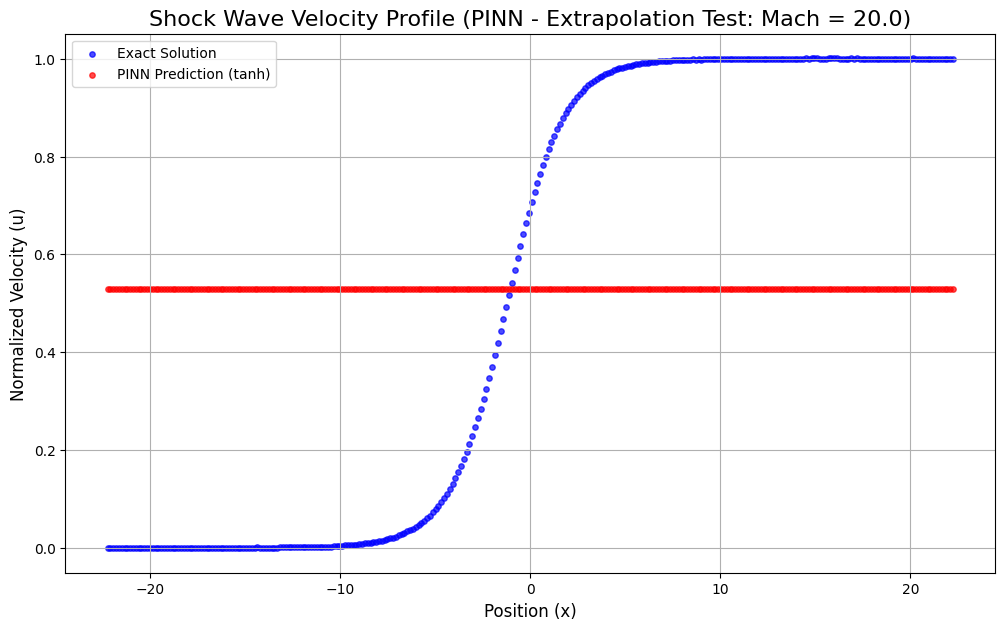

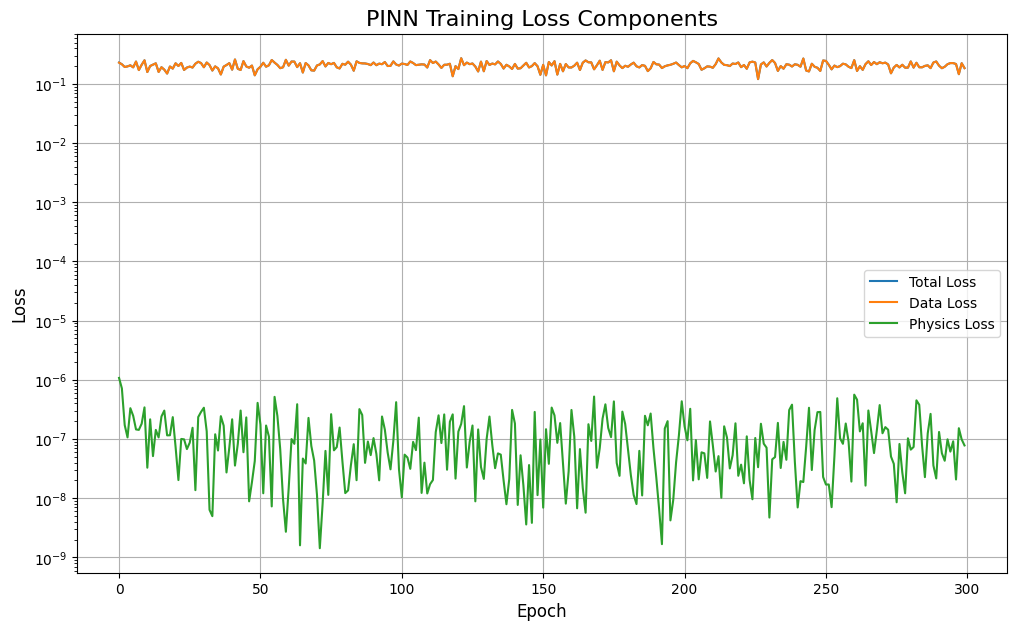

In [10]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import MinMaxScaler

# --- 1. Data Loading and Normalization (No Changes) ---

# Path for files uploaded directly to the Colab session
DATASET_PATH = './'

# Setup for the extrapolation test
train_files = ['M14.txt', 'M15.txt', 'M16.txt', 'M17.txt', 'M18.txt', 'M19.txt']
test_file = 'M20.txt'

if not os.path.exists(os.path.join(DATASET_PATH, train_files[0])):
    raise FileNotFoundError(f"Data files not found in '{DATASET_PATH}'. Please make sure you have uploaded the .txt files.")

def load_data(files, path):
    x_data, y_data, mach_data = [], [], []
    for file_name in files:
        mach_number = float(file_name.replace('M', '').replace('.txt', ''))
        full_path = os.path.join(path, file_name)
        data = np.loadtxt(full_path)
        x_data.append(data[:, 0])
        y_data.append(data[:, 2])
        mach_data.append(np.full(data.shape[0], mach_number))
    return np.concatenate(x_data), np.concatenate(y_data), np.concatenate(mach_data)

print("Loading data for velocity prediction...")
x_train, y_train, mach_train = load_data(train_files, DATASET_PATH)
x_test, y_test, mach_test = load_data([test_file], DATASET_PATH)

X_train_original = np.stack([x_train, mach_train], axis=1)
X_test_original = np.stack([x_test, mach_test], axis=1)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

print("Normalizing input data...")
x_scaler = MinMaxScaler()
X_train_scaled = x_scaler.fit_transform(X_train_original)
X_test_scaled = x_scaler.transform(X_test_original)
print("Normalization successful.")

X_train_tf = tf.convert_to_tensor(X_train_scaled, dtype=tf.float32)
y_train_tf = tf.convert_to_tensor(y_train, dtype=tf.float32)


# --- 2. Physics-Informed Neural Network (PINN) Model ---

class PINN(keras.Model):
    def __init__(self, **kwargs):
        super(PINN, self).__init__(**kwargs)
        # --- IMPROVEMENT 1: Changed activation function to tanh ---
        self.dense1 = layers.Dense(128, activation='tanh')
        self.dense2 = layers.Dense(128, activation='tanh')
        self.dense3 = layers.Dense(128, activation='tanh')
        self.u_output = layers.Dense(1, activation='sigmoid')

        self.nu = 0.05 / np.pi
        # --- IMPROVEMENT 2: Drastically increased the physics loss weight ---
        self.lambda_physics = 1000.0 # Was 10.0, now 1000.0

    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        x = self.dense3(x)
        return self.u_output(x)

    def train_step(self, data):
        x, y = data

        with tf.GradientTape() as tape:
            y_pred = self(x, training=True)
            data_loss = self.compiled_loss(y, y_pred)

            with tf.GradientTape() as tape2:
                tape2.watch(x)
                with tf.GradientTape() as tape1:
                    tape1.watch(x)
                    u_for_physics = self(x, training=True)
                du_dx = tape1.gradient(u_for_physics, x)
            d2u_dx2 = tape2.gradient(du_dx, x)

            du_dx_component = du_dx[:, 0]
            d2u_dx2_component = d2u_dx2[:, 0]

            physics_residual = y_pred[:, 0] * du_dx_component - self.nu * d2u_dx2_component
            physics_loss = tf.reduce_mean(tf.square(physics_residual))

            total_loss = data_loss + self.lambda_physics * physics_loss

        trainable_vars = self.trainable_variables
        gradients = tape.gradient(total_loss, trainable_vars)
        self.optimizer.apply_gradients(zip(gradients, trainable_vars))

        self.compiled_metrics.update_state(y, y_pred)
        return {"data_loss": data_loss, "physics_loss": physics_loss, "total_loss": total_loss}

print("\nBuilding the PINN model with new architecture...")
model = PINN()
optimizer = keras.optimizers.Adam(learning_rate=1e-4)
model.compile(optimizer=optimizer, loss='mean_squared_error')

print("\nStarting PINN training...")
history = model.fit(X_train_tf, y_train_tf, epochs=300, verbose=1)
print("Training finished.")


# --- 3. Evaluation and Plotting ---
print("\nEvaluating and predicting...")
y_pred = model.predict(X_test_scaled)

print("Plotting results...")
test_mach_number = mach_test[0]

plt.figure(figsize=(12, 7))
plt.scatter(x_test, y_test, label='Exact Solution', color='blue', s=15, alpha=0.7)
plt.scatter(x_test, y_pred, label='PINN Prediction (tanh)', color='red', s=15, alpha=0.7)
plt.title(f'Shock Wave Velocity Profile (PINN - Extrapolation Test: Mach = {test_mach_number})', fontsize=16)
plt.xlabel('Position (x)', fontsize=12)
plt.ylabel('Normalized Velocity (u)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 7))
plt.plot(history.history['total_loss'], label='Total Loss')
plt.plot(history.history['data_loss'], label='Data Loss')
plt.plot(history.history['physics_loss'], label='Physics Loss')
plt.title('PINN Training Loss Components', fontsize=16)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.show()

Loading data for velocity prediction...
Normalizing input data...
Normalization successful.

Building the wider model (128 neurons)...
Compiling model with a smaller learning rate...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_32 (Dense)                │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,537 (131.00 KB)

 Trainable params: 33,537 (131.00 KB)

 Non-trainable params: 0 (0.00 B)


Starting training for 400 epochs...
Epoch 1/400
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.1788 - val_loss: 0.0893
Epoch 2/400
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0768 - val_loss: 0.0302
Epoch 3/400
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0129 - val_loss: 0.0034
Epoch 4/400
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0018 - val_loss: 0.0019
Epoch 5/400
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.8890e-04 - val_loss: 7.4642e-04
Epoch 6/400
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.8138e-04 - val_loss: 4.6082e-04
Epoch 7/400
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.5939e-04 - val_loss: 7.0558e-04
Epoch 8/400
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.9626e-04 - val_loss: 7.5973e-04
Epoch 9/400
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.5976e-04 - val_loss: 3.1237e-04
Epoch 10/400
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.5289e-04 - val_loss: 7.1760e-04
Epoch 11/400
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.3

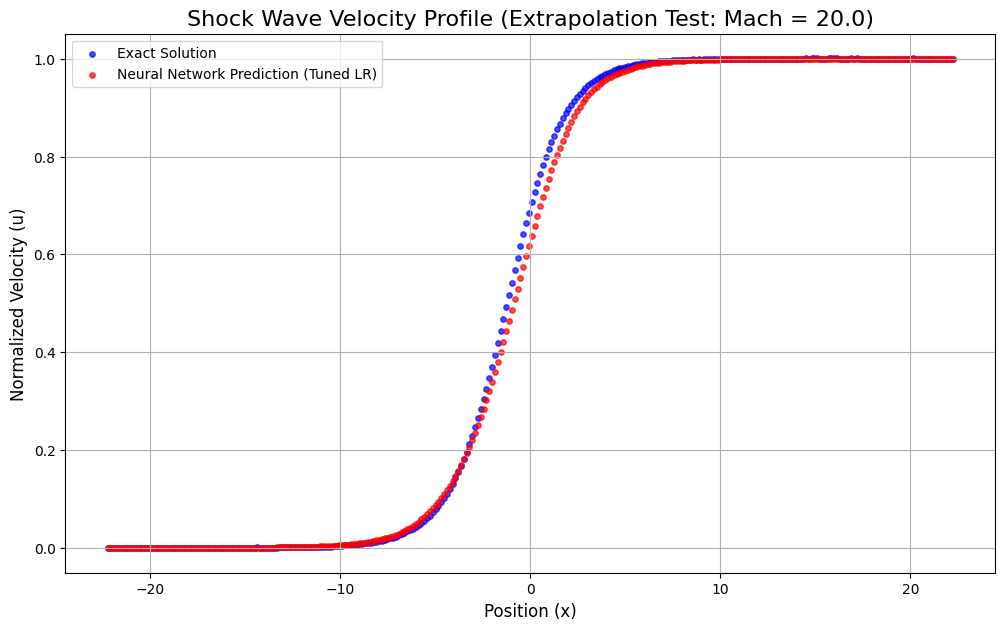

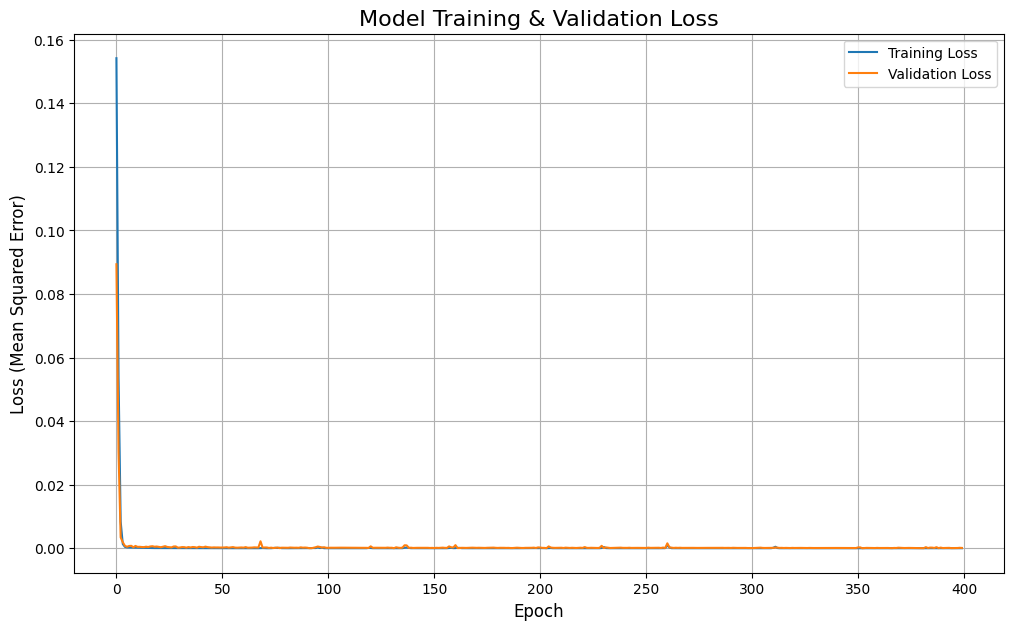

In [11]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import MinMaxScaler

# --- 1. Data Loading and Normalization (No Changes) ---

# Path for files uploaded directly to the Colab session
DATASET_PATH = './'

# Setup for the extrapolation test
train_files = ['M14.txt', 'M15.txt', 'M16.txt', 'M17.txt', 'M18.txt', 'M19.txt']
test_file = 'M20.txt'

if not os.path.exists(os.path.join(DATASET_PATH, train_files[0])):
    raise FileNotFoundError(f"Data files not found in '{DATASET_PATH}'. Please make sure you have uploaded the .txt files.")

def load_data(files, path):
    x_data, y_data, mach_data = [], [], []
    for file_name in files:
        mach_number = float(file_name.replace('M', '').replace('.txt', ''))
        full_path = os.path.join(path, file_name)
        data = np.loadtxt(full_path)
        x_data.append(data[:, 0])
        y_data.append(data[:, 2])
        mach_data.append(np.full(data.shape[0], mach_number))
    return np.concatenate(x_data), np.concatenate(y_data), np.concatenate(mach_data)

print("Loading data for velocity prediction...")
x_train, y_train, mach_train = load_data(train_files, DATASET_PATH)
x_test, y_test, mach_test = load_data([test_file], DATASET_PATH)

X_train_original = np.stack([x_train, mach_train], axis=1)
X_test_original = np.stack([x_test, mach_test], axis=1)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

print("Normalizing input data...")
x_scaler = MinMaxScaler()
X_train_scaled = x_scaler.fit_transform(X_train_original)
X_test_scaled = x_scaler.transform(X_test_original)
print("Normalization successful.")


# -- 2. Neural Network Design and Training --
# Using the successful wide architecture
print("\nBuilding the wider model (128 neurons)...")
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=[2]),
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# --- IMPROVEMENT: Fine-tuning the optimizer's learning rate ---
print("Compiling model with a smaller learning rate...")
optimizer = keras.optimizers.Adam(learning_rate=0.0005) # Half the default learning rate

model.compile(optimizer=optimizer, loss='mean_squared_error')
model.summary()

# --- IMPROVEMENT: Increased epochs to allow for convergence with smaller learning rate ---
print("\nStarting training for 400 epochs...")
history = model.fit(
    X_train_scaled, y_train,
    epochs=400,
    validation_split=0.2,
    verbose=1
)
print("Training finished.")


# -- 3. Evaluation and Plotting --
print("\nEvaluating and predicting...")
loss = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Mean Squared Error on Test Data: {loss:.6f}")

y_pred = model.predict(X_test_scaled)

print("Plotting results...")
test_mach_number = mach_test[0]

# --- Comparison Plot ---
plt.figure(figsize=(12, 7))
plt.scatter(x_test, y_test, label='Exact Solution', color='blue', s=15, alpha=0.7)
plt.scatter(x_test, y_pred, label='Neural Network Prediction (Tuned LR)', color='red', s=15, alpha=0.7)
plt.title(f'Shock Wave Velocity Profile (Extrapolation Test: Mach = {test_mach_number})', fontsize=16)
plt.xlabel('Position (x)', fontsize=12)
plt.ylabel('Normalized Velocity (u)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# --- Loss Curve Plot ---
plt.figure(figsize=(12, 7))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Training & Validation Loss', fontsize=16)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss (Mean Squared Error)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

Loading data...
Creating Fourier features...
Normalizing final input data...
Normalization successful.

Building model with new input shape: [129]


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                │ (None, 128)            │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49,793 (194.50 KB)

 Trainable params: 49,793 (194.50 KB)

 Non-trainable params: 0 (0.00 B)


Starting training for 400 epochs...
Epoch 1/400
45/45 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - loss: 0.2026 - val_loss: 0.2143
Epoch 2/400
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.1880 - val_loss: 0.1957
Epoch 3/400
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.1722 - val_loss: 0.1590
Epoch 4/400
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.1381 - val_loss: 0.1128
Epoch 5/400
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0876 - val_loss: 0.0556
Epoch 6/400
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0344 - val_loss: 0.0231
Epoch 7/400
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0104 - val_loss: 0.0074
Epoch 8/400
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0039 - val_loss: 0.0039
Epoch 9/400
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0024 - val_loss: 0.0028
Epoch 10/400
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0019 - val_loss: 0.0034
Epoch 11/400
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0022 - val_loss: 0.0023
Epoch 12/400
45/45 ━━━

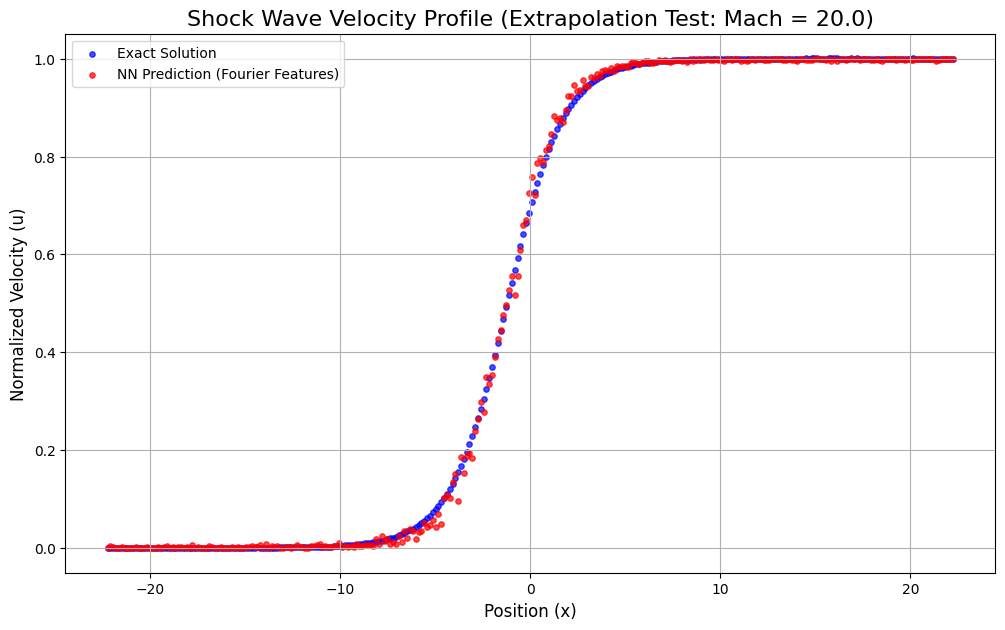

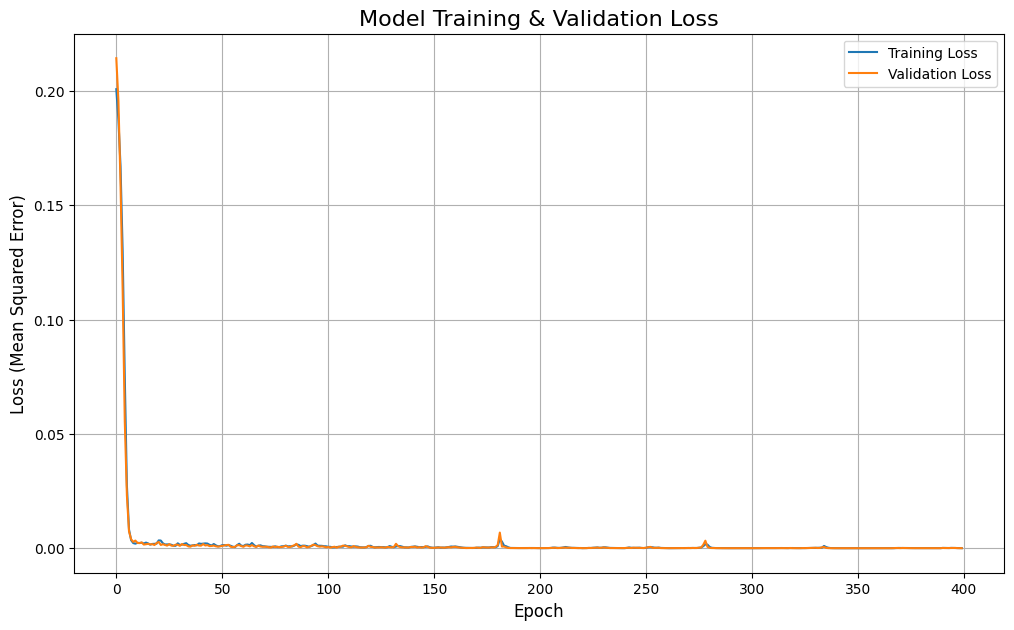

In [12]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import MinMaxScaler

# --- 1. Fourier Feature Mapping Class ---
# این کلاس برای تبدیل ورودی موقعیت به ویژگی‌های فوریه استفاده می‌شود
class FourierFeatureMapper:
    def __init__(self, input_dims, output_dims, scale=10.0):
        self.input_dims = input_dims
        self.output_dims = output_dims
        # ماتریس B برای نگاشت فرکانس‌ها به صورت تصادفی ساخته می‌شود
        self.B = tf.random.normal([input_dims, output_dims // 2]) * scale

    def map(self, x):
        # x را به فرمت مناسب برای ضرب ماتریسی در می‌آوریم
        x_proj = 2 * np.pi * tf.cast(x, tf.float32) @ self.B
        # ویژگی‌های سینوسی و کسینوسی را محاسبه و به هم متصل می‌کنیم
        return tf.concat([tf.sin(x_proj), tf.cos(x_proj)], axis=-1)

# --- 2. Data Loading (No Changes) ---
DATASET_PATH = './'
train_files = ['M14.txt', 'M15.txt', 'M16.txt', 'M17.txt', 'M18.txt', 'M19.txt']
test_file = 'M20.txt'

if not os.path.exists(os.path.join(DATASET_PATH, train_files[0])):
    raise FileNotFoundError(f"Data files not found in '{DATASET_PATH}'. Please make sure you have uploaded the .txt files.")

def load_data(files, path):
    x_data, y_data, mach_data = [], [], []
    for file_name in files:
        mach_number = float(file_name.replace('M', '').replace('.txt', ''))
        full_path = os.path.join(path, file_name)
        data = np.loadtxt(full_path)
        x_data.append(data[:, 0])
        y_data.append(data[:, 2])
        mach_data.append(np.full(data.shape[0], mach_number))
    return np.concatenate(x_data), np.concatenate(y_data), np.concatenate(mach_data)

print("Loading data...")
x_train, y_train, mach_train = load_data(train_files, DATASET_PATH)
x_test, y_test, mach_test = load_data([test_file], DATASET_PATH)

# Reshape for processing
x_train = x_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)
mach_train = mach_train.reshape(-1, 1)
mach_test = mach_test.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

# --- 3. Apply Fourier Features and Normalize ---
print("Creating Fourier features...")
# تعداد ویژگی‌های فوریه که می‌خواهیم بسازیم (باید زوج باشد)
fourier_output_dims = 128
mapper = FourierFeatureMapper(input_dims=1, output_dims=fourier_output_dims)

# تبدیل داده‌های موقعیت به ویژگی‌های فوریه
x_train_fourier = mapper.map(x_train)
x_test_fourier = mapper.map(x_test)

# ترکیب ویژگی‌های فوریه با عدد ماخ برای ساخت ورودی نهایی
X_train_final = np.hstack([x_train_fourier, mach_train])
X_test_final = np.hstack([x_test_fourier, mach_test])

print("Normalizing final input data...")
# فقط ورودی نهایی را نرمالایز می‌کنیم
x_scaler = MinMaxScaler()
X_train_scaled = x_scaler.fit_transform(X_train_final)
X_test_scaled = x_scaler.transform(X_test_final)
print("Normalization successful.")


# --- 4. Neural Network Design and Training ---
# مدل ورودی با ابعاد جدید را دریافت می‌کند
input_shape = [X_train_scaled.shape[1]]
print(f"\nBuilding model with new input shape: {input_shape}")

model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

optimizer = keras.optimizers.Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='mean_squared_error')
model.summary()

print("\nStarting training for 400 epochs...")
history = model.fit(
    X_train_scaled, y_train,
    epochs=400,
    validation_split=0.2,
    verbose=1
)
print("Training finished.")


# -- 5. Evaluation and Plotting --
print("\nEvaluating and predicting...")
loss = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Mean Squared Error on Test Data: {loss:.6f}")

y_pred = model.predict(X_test_scaled)

print("Plotting results...")
test_mach_number = mach_test[0, 0]

plt.figure(figsize=(12, 7))
# از x_test اصلی برای رسم محور افقی استفاده می‌کنیم
plt.scatter(x_test, y_test, label='Exact Solution', color='blue', s=15, alpha=0.7)
plt.scatter(x_test, y_pred, label='NN Prediction (Fourier Features)', color='red', s=15, alpha=0.7)
plt.title(f'Shock Wave Velocity Profile (Extrapolation Test: Mach = {test_mach_number})', fontsize=16)
plt.xlabel('Position (x)', fontsize=12)
plt.ylabel('Normalized Velocity (u)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 7))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Training & Validation Loss', fontsize=16)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss (Mean Squared Error)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

Loading data...
Creating Fourier features...
Normalizing final input data...
Normalization successful.

Building regularized model with input shape: [129]


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_40 (Dense)                │ (None, 128)            │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49,793 (194.50 KB)

 Trainable params: 49,793 (194.50 KB)

 Non-trainable params: 0 (0.00 B)


Starting training for 400 epochs...
Epoch 1/400
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.2041 - val_loss: 0.2017
Epoch 2/400
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1827 - val_loss: 0.1666
Epoch 3/400
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1420 - val_loss: 0.1075
Epoch 4/400
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0840 - val_loss: 0.0498
Epoch 5/400
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0267 - val_loss: 0.0142
Epoch 6/400
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0097 - val_loss: 0.0073
Epoch 7/400
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0065 - val_loss: 0.0065
Epoch 8/400
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0054 - val_loss: 0.0074
Epoch 9/400
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0063 - val_loss: 0.0066
Epoch 10/400
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0065 - val_loss: 0.0057
Epoch 11/400
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0058 - val_loss: 0.0062
Epoch 12/400
45/45 ━━━━━━

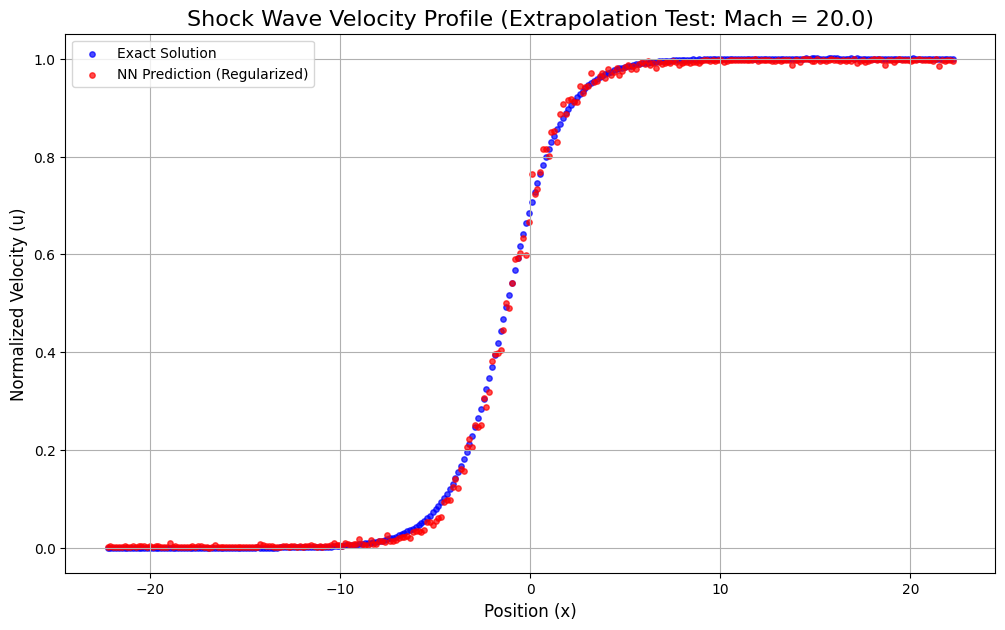

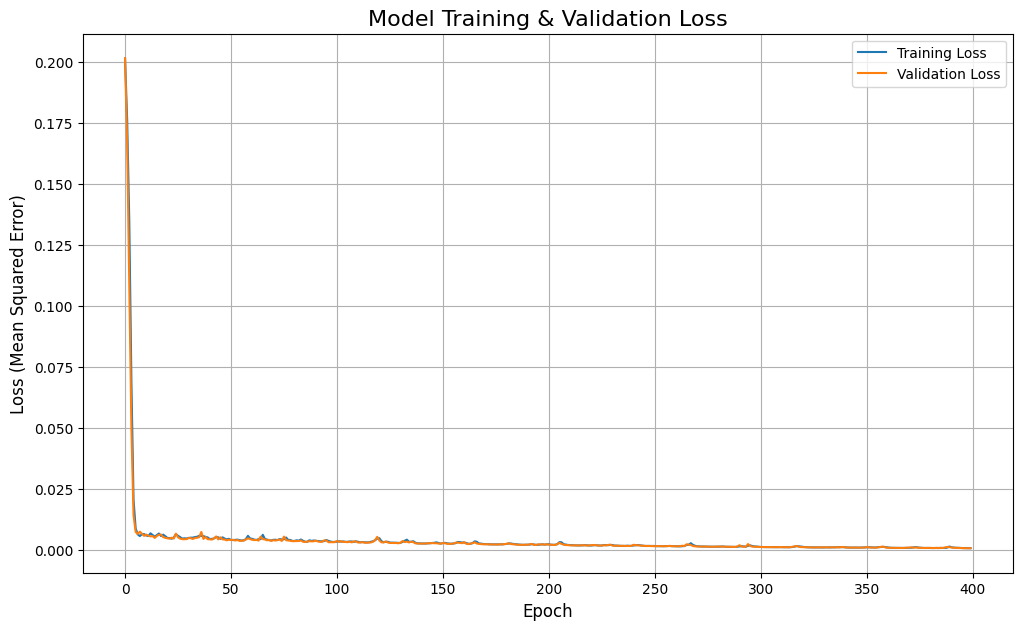

In [13]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import MinMaxScaler

# --- 1. Fourier Feature Mapping Class (No Changes) ---
class FourierFeatureMapper:
    def __init__(self, input_dims, output_dims, scale=10.0):
        self.input_dims = input_dims
        self.output_dims = output_dims
        self.B = tf.random.normal([input_dims, output_dims // 2]) * scale

    def map(self, x):
        x_proj = 2 * np.pi * tf.cast(x, tf.float32) @ self.B
        return tf.concat([tf.sin(x_proj), tf.cos(x_proj)], axis=-1)

# --- 2. Data Loading (No Changes) ---
DATASET_PATH = './'
train_files = ['M14.txt', 'M15.txt', 'M16.txt', 'M17.txt', 'M18.txt', 'M19.txt']
test_file = 'M20.txt'

if not os.path.exists(os.path.join(DATASET_PATH, train_files[0])):
    raise FileNotFoundError(f"Data files not found in '{DATASET_PATH}'. Please make sure you have uploaded the .txt files.")

def load_data(files, path):
    x_data, y_data, mach_data = [], [], []
    for file_name in files:
        mach_number = float(file_name.replace('M', '').replace('.txt', ''))
        full_path = os.path.join(path, file_name)
        data = np.loadtxt(full_path)
        x_data.append(data[:, 0])
        y_data.append(data[:, 2])
        mach_data.append(np.full(data.shape[0], mach_number))
    return np.concatenate(x_data), np.concatenate(y_data), np.concatenate(mach_data)

print("Loading data...")
x_train, y_train, mach_train = load_data(train_files, DATASET_PATH)
x_test, y_test, mach_test = load_data([test_file], DATASET_PATH)

x_train = x_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)
mach_train = mach_train.reshape(-1, 1)
mach_test = mach_test.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

# --- 3. Apply Fourier Features and Normalize (No Changes) ---
print("Creating Fourier features...")
fourier_output_dims = 128
mapper = FourierFeatureMapper(input_dims=1, output_dims=fourier_output_dims)

x_train_fourier = mapper.map(x_train)
x_test_fourier = mapper.map(x_test)

X_train_final = np.hstack([x_train_fourier, mach_train])
X_test_final = np.hstack([x_test_fourier, mach_test])

print("Normalizing final input data...")
x_scaler = MinMaxScaler()
X_train_scaled = x_scaler.fit_transform(X_train_final)
X_test_scaled = x_scaler.transform(X_test_final)
print("Normalization successful.")


# --- 4. Neural Network Design and Training ---
# --- IMPROVEMENT: Added L2 Regularization to hidden layers ---
input_shape = [X_train_scaled.shape[1]]
l2_strength = 1e-5 # مقدار کوچک برای ضریب جریمه L2

print(f"\nBuilding regularized model with input shape: {input_shape}")

model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape,
                 kernel_regularizer=keras.regularizers.l2(l2_strength)), # <<<< L2 Regularization
    layers.Dense(128, activation='relu',
                 kernel_regularizer=keras.regularizers.l2(l2_strength)), # <<<< L2 Regularization
    layers.Dense(128, activation='relu',
                 kernel_regularizer=keras.regularizers.l2(l2_strength)), # <<<< L2 Regularization
    layers.Dense(1, activation='sigmoid')
])

optimizer = keras.optimizers.Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='mean_squared_error')
model.summary()

print("\nStarting training for 400 epochs...")
history = model.fit(
    X_train_scaled, y_train,
    epochs=400,
    validation_split=0.2,
    verbose=1
)
print("Training finished.")


# -- 5. Evaluation and Plotting --
print("\nEvaluating and predicting...")
loss = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Mean Squared Error on Test Data: {loss:.6f}")

y_pred = model.predict(X_test_scaled)

print("Plotting results...")
test_mach_number = mach_test[0, 0]

plt.figure(figsize=(12, 7))
plt.scatter(x_test, y_test, label='Exact Solution', color='blue', s=15, alpha=0.7)
plt.scatter(x_test, y_pred, label='NN Prediction (Regularized)', color='red', s=15, alpha=0.7)
plt.title(f'Shock Wave Velocity Profile (Extrapolation Test: Mach = {test_mach_number})', fontsize=16)
plt.xlabel('Position (x)', fontsize=12)
plt.ylabel('Normalized Velocity (u)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 7))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Training & Validation Loss', fontsize=16)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss (Mean Squared Error)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

Loading data...
Creating Fourier features...
Normalizing final input data...
Normalization successful.

Building model with tanh activation and input shape: [129]


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_44 (Dense)                │ (None, 128)            │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49,793 (194.50 KB)

 Trainable params: 49,793 (194.50 KB)

 Non-trainable params: 0 (0.00 B)


Starting training for 400 epochs...
Epoch 1/400
45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.2067 - val_loss: 0.1416
Epoch 2/400
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0962 - val_loss: 0.0474
Epoch 3/400
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0296 - val_loss: 0.0127
Epoch 4/400
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0061 - val_loss: 0.0031
Epoch 5/400
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0029 - val_loss: 0.0023
Epoch 6/400
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0018 - val_loss: 0.0016
Epoch 7/400
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0015 - val_loss: 0.0012
Epoch 8/400
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 9/400
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.2009e-04 - val_loss: 0.0014
Epoch 10/400
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0010 - val_loss: 0.0019
Epoch 11/400
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 12/400
45/45 ━

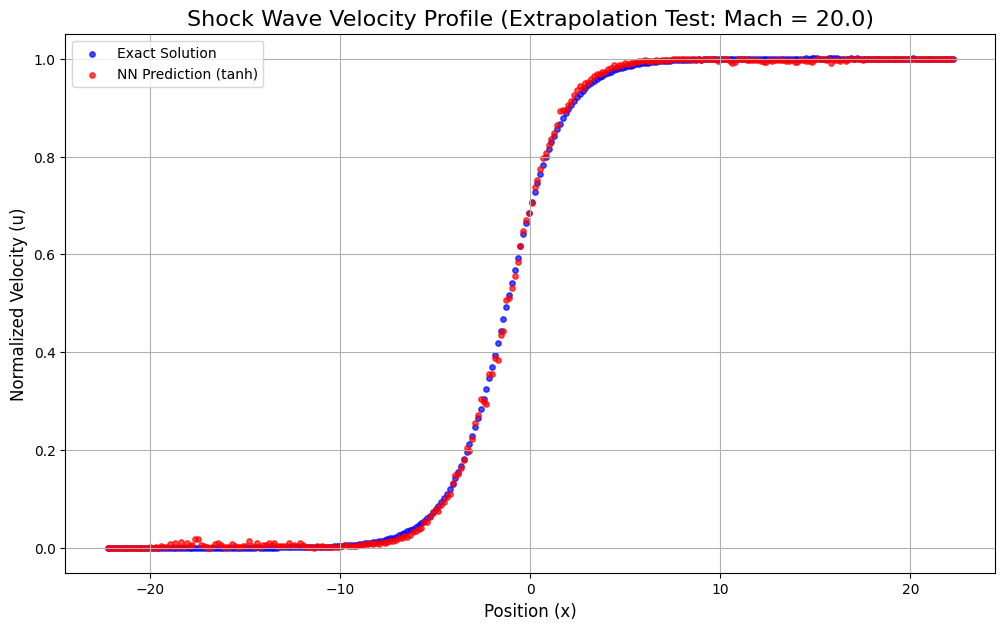

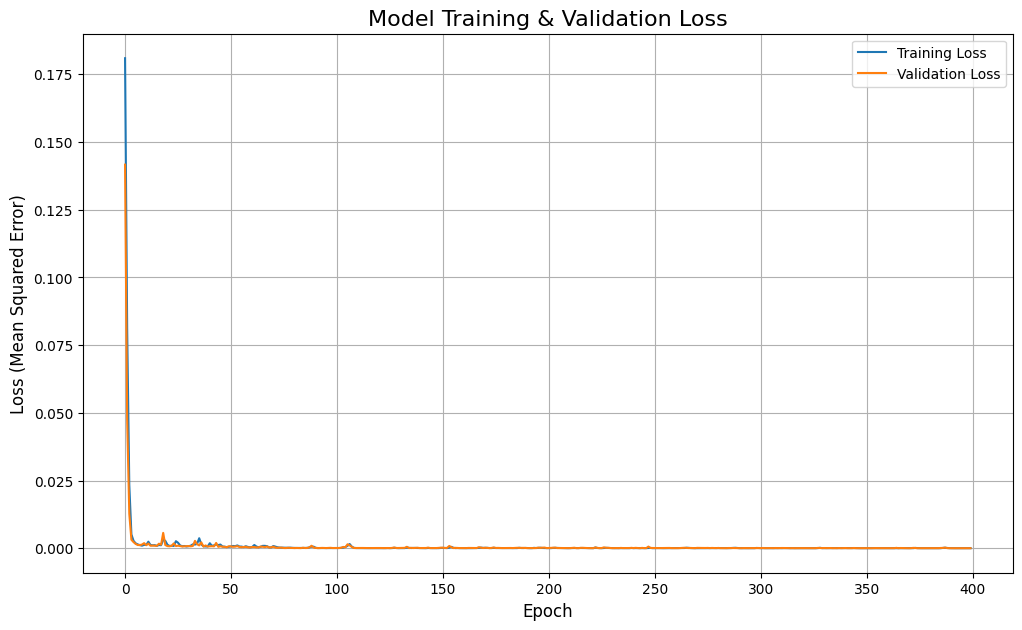

In [14]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import MinMaxScaler

# --- 1. Fourier Feature Mapping Class (No Changes) ---
class FourierFeatureMapper:
    def __init__(self, input_dims, output_dims, scale=10.0):
        self.input_dims = input_dims
        self.output_dims = output_dims
        self.B = tf.random.normal([input_dims, output_dims // 2]) * scale

    def map(self, x):
        x_proj = 2 * np.pi * tf.cast(x, tf.float32) @ self.B
        return tf.concat([tf.sin(x_proj), tf.cos(x_proj)], axis=-1)

# --- 2. Data Loading (No Changes) ---
DATASET_PATH = './'
train_files = ['M14.txt', 'M15.txt', 'M16.txt', 'M17.txt', 'M18.txt', 'M19.txt']
test_file = 'M20.txt'

if not os.path.exists(os.path.join(DATASET_PATH, train_files[0])):
    raise FileNotFoundError(f"Data files not found in '{DATASET_PATH}'. Please make sure you have uploaded the .txt files.")

def load_data(files, path):
    x_data, y_data, mach_data = [], [], []
    for file_name in files:
        mach_number = float(file_name.replace('M', '').replace('.txt', ''))
        full_path = os.path.join(path, file_name)
        data = np.loadtxt(full_path)
        x_data.append(data[:, 0])
        y_data.append(data[:, 2])
        mach_data.append(np.full(data.shape[0], mach_number))
    return np.concatenate(x_data), np.concatenate(y_data), np.concatenate(mach_data)

print("Loading data...")
x_train, y_train, mach_train = load_data(train_files, DATASET_PATH)
x_test, y_test, mach_test = load_data([test_file], DATASET_PATH)

x_train = x_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)
mach_train = mach_train.reshape(-1, 1)
mach_test = mach_test.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

# --- 3. Apply Fourier Features and Normalize (No Changes) ---
print("Creating Fourier features...")
fourier_output_dims = 128
mapper = FourierFeatureMapper(input_dims=1, output_dims=fourier_output_dims)

x_train_fourier = mapper.map(x_train)
x_test_fourier = mapper.map(x_test)

X_train_final = np.hstack([x_train_fourier, mach_train])
X_test_final = np.hstack([x_test_fourier, mach_test])

print("Normalizing final input data...")
x_scaler = MinMaxScaler()
X_train_scaled = x_scaler.fit_transform(X_train_final)
X_test_scaled = x_scaler.transform(X_test_final)
print("Normalization successful.")


# --- 4. Neural Network Design and Training ---
# --- FINAL TUNING: Changed hidden layer activation to tanh ---
input_shape = [X_train_scaled.shape[1]]
print(f"\nBuilding model with tanh activation and input shape: {input_shape}")

model = keras.Sequential([
    layers.Dense(128, activation='tanh', input_shape=input_shape), # <<<< Changed to tanh
    layers.Dense(128, activation='tanh'),                        # <<<< Changed to tanh
    layers.Dense(128, activation='tanh'),                        # <<<< Changed to tanh
    layers.Dense(1, activation='sigmoid')
])

optimizer = keras.optimizers.Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='mean_squared_error')
model.summary()

print("\nStarting training for 400 epochs...")
history = model.fit(
    X_train_scaled, y_train,
    epochs=400,
    validation_split=0.2,
    verbose=1
)
print("Training finished.")


# -- 5. Evaluation and Plotting --
print("\nEvaluating and predicting...")
loss = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Mean Squared Error on Test Data: {loss:.6f}")

y_pred = model.predict(X_test_scaled)

print("Plotting results...")
test_mach_number = mach_test[0, 0]

plt.figure(figsize=(12, 7))
plt.scatter(x_test, y_test, label='Exact Solution', color='blue', s=15, alpha=0.7)
plt.scatter(x_test, y_pred, label='NN Prediction (tanh)', color='red', s=15, alpha=0.7)
plt.title(f'Shock Wave Velocity Profile (Extrapolation Test: Mach = {test_mach_number})', fontsize=16)
plt.xlabel('Position (x)', fontsize=12)
plt.ylabel('Normalized Velocity (u)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 7))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Training & Validation Loss', fontsize=16)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss (Mean Squared Error)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()